# Tourist Accommodations Data

**Objective**  
This part is dedicated to Data Wrangling and EDA of tourist accommodation dataset.

**Description and characteristics of dataset**  
Tourist rental property listings on major platforms.

The characteristics of this dataset are as follows:
- Estimated volume: 25,000 records every 7 days
- Historical data: Available from 2017-01

**Data description**  
[Data description](https://datamarket.es/#alojamientos-turisticos-dataset)  
[Data overview (number of non missing values, unique, missing values)](https://github.com/ITACADEMYprojectes/ProjecteData/blob/main/Equip_F/Data/data_overview.xlsx)

In [311]:
# import libraries 
import os
import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlalchemy

from dotenv import load_dotenv, find_dotenv

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")

In [231]:
# font sizes
plt.rcParams['figure.titlesize'] = 18 
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['font.size'] = 14             
plt.rcParams['axes.labelsize'] = 14  

plt.rcParams['xtick.labelsize'] = 12      
plt.rcParams['ytick.labelsize'] = 12       
plt.rcParams['legend.fontsize'] = 12

# display settings
#pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', '{:.2f}'.format)
 
# set palette
sns.set_palette('Paired')

sns.set_style("darkgrid")

In [232]:
# Check versions of libraries
def lib_versions(libs):
    for lib in libs: print('Version', lib.__name__, '-', lib.__version__)

lib_versions([np, pd, mpl, sns])

Version numpy - 1.25.2
Version pandas - 2.0.3
Version matplotlib - 3.10.0
Version seaborn - 0.13.2


## Data Loading

In [233]:
PATH = 'Data'
SPRINT = 1
filename = f'data_sprint_{SPRINT}.csv'

In [234]:
# define function to read file
def read_file(sprint):
    
    """Input: name of the file with original data.
    Function reads .csv data of desired sprint. 
    Output: Dataframe or error.
    """
    
    # reading file
    try:
        df = pd.read_csv(os.path.join('..', PATH, filename), 
                         parse_dates=['insert_date', 'first_review_date', 'last_review_date'], 
                         date_format='%d/%m/%Y')
        display(df.head())
        return df
    except Exception as error:
        print("An exception occurred:", error)
        return error     

In [235]:
df = read_file(filename)

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,NaN,Private room,2,2.00,1.00,1.00,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.00,3,365,VERDADERO,7,20,40,130,78,2010-01-02,2017-09-05,970.00,100.00,100.00,100.00,100.00,100.00,100.00,FALSO,75.00,spain,malaga,2018-07-31
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1.00,1.00,1.00,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",170.00,4,40,VERDADERO,0,0,0,162,33,2014-10-10,2018-07-15,920.00,90.00,90.00,100.00,100.00,80.00,90.00,FALSO,52.00,spain,madrid,2020-01-10
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1.00,2.00,2.00,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.00,2,120,VERDADERO,26,31,31,270,148,2011-01-05,2019-07-22,980.00,100.00,100.00,100.00,100.00,100.00,100.00,VERDADERO,142.00,spain,sevilla,2019-07-29
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2.00,1.00,1.00,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",400.00,2,730,VERDADERO,9,23,49,300,292,2012-03-13,2020-01-04,940.00,100.00,90.00,100.00,100.00,100.00,90.00,VERDADERO,306.00,spain,barcelona,2020-01-10
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,NaN,Private room,5,1.00,2.00,5.00,"Wifi,Pool,Free parking on premises,Breakfast,P...",900.00,1,180,VERDADERO,0,19,49,312,36,2011-07-08,2018-08-08,970.00,100.00,100.00,100.00,100.00,100.00,100.00,FALSO,39.00,spain,girona,2019-02-19


## Data Overview

In [236]:
# define function to display information about the data
def data_info(df):
   
    """Input: dataframe.
    Function displays basic information, 
    checks for duplicates and NaN. 
    """
    
    # get information about the data
    print(df.info())
    
    # number of unique values for each column
    print()
    print('\033[1mNumber of unique values')
    display(df.nunique())

    # check for NaN
    if df.isna().sum().sum() > 0:
        print()
        print('\033[1mNumber of missing values')
        display(
            pd.DataFrame({'number': df.isna().sum(), 
                          'percentage': df.isna().mean().mul(100)})
            .query('number > 0')
            .sort_values(by='number', ascending=False)
        )
    else:
        print('There are no NaNs in the data\n')
    
    # check for duplicates (without id columns)
    print()
    if df.iloc[:,1:].duplicated().sum() > 0:
        print('Data contain full duplicates\n')
    else:
        print('There are no full duplicates in the data\n')

In [237]:
data_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   apartment_id                 7001 non-null   int64         
 1   name                         6998 non-null   object        
 2   description                  6972 non-null   object        
 3   host_id                      7001 non-null   int64         
 4   neighbourhood_name           7001 non-null   object        
 5   neighbourhood_district       4241 non-null   object        
 6   room_type                    7001 non-null   object        
 7   accommodates                 7001 non-null   int64         
 8   bathrooms                    6969 non-null   float64       
 9   bedrooms                     6972 non-null   float64       
 10  beds                         6998 non-null   float64       
 11  amenities_list               6984 non-null 

apartment_id                   6733
name                           6755
description                    6790
host_id                        5239
neighbourhood_name              478
neighbourhood_district           61
room_type                         4
accommodates                     19
bathrooms                        13
bedrooms                         14
beds                             22
amenities_list                 6792
price                           383
minimum_nights                   38
maximum_nights                  129
has_availability                  1
availability_30                  31
availability_60                  61
availability_90                  91
availability_365                366
number_of_reviews               319
first_review_date              1793
last_review_date               1459
review_scores_rating             45
review_scores_accuracy            9
review_scores_cleanliness         8
review_scores_checkin             8
review_scores_communication 


Number of missing values


,number,percentage
neighbourhood_district,2760,39.42
review_scores_value,1342,19.17
review_scores_location,1342,19.17
review_scores_checkin,1341,19.15
review_scores_accuracy,1336,19.08
review_scores_communication,1332,19.03
review_scores_cleanliness,1330,19.00
review_scores_rating,1327,18.95
last_review_date,1255,17.93
first_review_date,1254,17.91



There are no full duplicates in the data



In [238]:
df.country.unique(), df.city.unique()

(array(['spain'], dtype=object),
 array(['malaga', 'madrid', 'sevilla', 'barcelona', 'girona', 'valencia',
        'mallorca', 'menorca'], dtype=object))


---

The dataset contains 7,001 rows and 35 columns.  
The unique values in country and city confirm that the dataset focuses on Spain, covering six cities—'Malaga', 'Madrid', 'Sevilla', 'Barcelona', 'Girona', and 'Valencia'—as well as two islands: 'Mallorca' and 'Menorca'.

*Missing Values*
- 130 rows lack a `price` value.
- The `neighbourhood_district` column has 2,760 missing values (~39% of the data).
- Review-related columns have between 1,250 and 1,327 missing values.
- 550 rows are missing `has_availability` information.

*Duplicates*
- 268 duplicate values in `apartment_id`.
- 243 duplicate values in `name`.
- 182 duplicate values in `description`.
- 192 duplicate values in `amenities_list`.

*Text format issues*  
The presence of � (replacement characters) in string columns is likely due to incorrect encoding, which prevents proper display of special characters (e.g., Spanish accents: á, é, í, ó, ú, ñ).

**Conclusion**  
Before performing an exhaustive EDA, several data quality issues need to be addressed:  
*Missing Values*
- The missing `price` values should be investigated, as they directly impact the marketing business task.
- NaN values in `has_availability` can be treated as 'False', and depending on the business needs, these rows may be dropped.
- Missing values in other columns are not critical for Sprint_1 and do not affect KPIs.

*Duplicates*  
Duplicate apartment_id, name, and description should be analyzed. It's unusual for different apartments to have the same descriptions, which may indicate data inconsistencies or incorrect entries.

## Data Cleaning

### Duplicates

First, let's handle duplicates—removing them might also eliminate listings with missing prices.

In [239]:
print('Number of objects with 1 or more duplicates')
(df['apartment_id'].value_counts()>1).sum()

Number of objects with 1 or more duplicates


261

In [240]:
df['apartment_id'].value_counts().head(20)

apartment_id
10005342    3
10713417    3
14582385    3
24038577    3
15402794    3
14326808    3
13966456    3
6986979     2
22546373    2
12167208    2
15628078    2
12145784    2
12144391    2
12140710    2
20149628    2
1624014     2
15579708    2
17974912    2
18082152    2
12036000    2
Name: count, dtype: int64

In [241]:
df[df.apartment_id==10713417]

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
1989,10713417,Room in the heart of barcelona,Room in the center of barcelona just 2 minutes...,2456260,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,Private room,1,1.00,1.00,1.00,"Wifi,Kitchen,Smoking allowed,Pets allowed,Door...",370.00,2,1125,VERDADERO,0,0,7,282,68,2016-03-02,2018-09-30,960.00,100.00,90.00,100.00,100.00,100.00,100.00,VERDADERO,214.00,spain,barcelona,2018-10-10
1990,10713417,Room in the heart of barcelona,Room in the center of barcelona just 2 minutes...,2456260,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,Private room,1,1.00,1.00,1.00,"Wifi,Kitchen,Smoking allowed,Pets allowed,Door...",370.00,2,1125,VERDADERO,26,56,86,355,72,2016-03-02,2019-01-20,960.00,100.00,90.00,100.00,100.00,100.00,100.00,FALSO,196.00,spain,barcelona,2019-03-08
1991,10713417,Room in the heart of barcelona,Room in the center of barcelona just 2 minutes...,2456260,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,Private room,1,1.00,1.00,1.00,"Wireless Internet,Kitchen,Smoking allowed,Pets...",330.00,1,1125,VERDADERO,0,0,30,305,27,2016-03-02,2017-09-08,950.00,100.00,90.00,100.00,100.00,100.00,100.00,FALSO,138.00,spain,barcelona,2017-10-07


Some objects with the same `apartment_id` have 1 or even 2 duplicates recorded on different `insert_date` values. Let's check whether they also share the same name and location, as it's possible for different properties to have the same name but be in different places.

In [242]:
res = (df[df['apartment_id'].duplicated(keep=False)]
       .groupby('apartment_id')[['name', 'description', 'room_type', 'host_id', 'city', 'insert_date']]
       .nunique())

res

,name,description,room_type,host_id,city,insert_date
apartment_id,,,,,,
144471,1,1,1,1,1,2
157327,1,1,1,1,1,2
343864,1,1,1,1,1,2
503253,1,1,1,1,1,2
886569,1,2,1,1,1,2
...,...,...,...,...,...,...
26546841,1,0,1,1,1,2
26889462,1,1,1,1,1,2
26987062,1,0,1,1,1,2


In [243]:
res[res.insert_date<2]

,name,description,room_type,host_id,city,insert_date
apartment_id,,,,,,


`apartment_id` duplicates always have different `insert_date` → We can keep the most recent entry.

In [244]:
res[res.city>1]

,name,description,room_type,host_id,city,insert_date
apartment_id,,,,,,


`apartment_id` duplicates always belong to the same city → This supports the idea that they are actual duplicates rather than different properties.

In [245]:
res[res.room_type>1]

,name,description,room_type,host_id,city,insert_date
apartment_id,,,,,,
14288527,1,2,2,1,1,2
18682379,2,2,2,1,1,2
24342447,1,1,2,1,1,2


In [246]:
df[df.apartment_id.isin(res[res.room_type>1].index)]

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
2861,14288527,"Great penthouse with terrace, overlooking the sea",-The accommodation meets the Sanitary Cleaning...,34433429,Centro,NaN,Entire home/apt,2,1.00,1.00,1.00,"Free street parking, Garden or backyard, Iron,...",670.00,2,31,VERDADERO,19,49,79,160,237,2016-08-10,2020-10-12,970.00,100.00,100.00,100.00,100.00,100.00,100.00,VERDADERO,443.00,spain,malaga,2020-12-30
2862,14288527,"Great penthouse with terrace, overlooking the sea","Great penthouse with terrace, overlooking the ...",34433429,Este,NaN,Private room,2,1.00,1.00,1.00,"TV,Internet,Wireless Internet,Pool,Free parkin...",440.00,2,15,VERDADERO,14,18,40,41,102,2016-08-10,2017-11-21,970.00,100.00,100.00,100.00,100.00,90.00,100.00,VERDADERO,647.00,spain,malaga,2017-11-25
4238,18682379,"Lush, sunny & quiet 2 bedroom apartment",Search no more! Welcome to your spacious 2 bed...,27775148,la Dreta de l'Eixample,Eixample,Entire home/apt,4,1.00,2.00,2.00,"Wifi,Kitchen,Breakfast,Elevator,Family/kid fri...",2750.00,4,60,VERDADERO,0,8,8,14,8,2017-07-18,2019-01-01,1000.00,100.00,100.00,100.00,100.00,100.00,90.00,FALSO,44.00,spain,barcelona,2019-01-14
4239,18682379,"Lush, sunny & quiet 2ble room in Barcelona center",Search no more! Welcome to your spacious doubl...,27775148,la Dreta de l'Eixample,Eixample,Private room,2,1.00,1.00,1.00,"Wireless Internet,Kitchen,Breakfast,Elevator,F...",650.00,2,20,VERDADERO,0,0,13,288,4,2017-07-18,2017-08-18,1000.00,100.00,100.00,100.00,100.00,100.00,100.00,FALSO,146.00,spain,barcelona,2017-10-07
6262,24342447,Suite Apt 4 pax en Sants,Apartamento con capacidad para 4 personas con ...,3346610,Sants,Sants-Montju�c,Hotel room,4,NaN,1.00,4.00,"TV,Internet,Wifi,Air conditioning,Kitchen,Pets...",2000.00,1,1125,VERDADERO,0,16,46,160,8,2018-08-04,2019-10-23,900.00,90.00,90.00,100.00,100.00,100.00,90.00,VERDADERO,34.00,spain,barcelona,2020-07-17
6263,24342447,Suite Apt 4 pax en Sants,Apartamento con capacidad para 4 personas con ...,3346610,Sants,Sants-Montju�c,Entire home/apt,4,1.00,1.00,2.00,"Internet,Wifi,Air conditioning,Free parking on...",1650.00,1,1125,VERDADERO,28,58,88,215,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDADERO,NaN,spain,barcelona,2018-07-10


In [247]:
res[res.host_id>1]

,name,description,room_type,host_id,city,insert_date
apartment_id,,,,,,
19196593,2,2,1,2,1,2


In [248]:
df.query('apartment_id==19196593')

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
4492,19196593,"Centro 4 con garaje gratis, 1 dormitorio",Apartamento de 1 dormitorio con garaje incluid...,18077486,Cruz De Humilladero,NaN,Entire home/apt,4,1.00,1.00,3.00,"Free street parking, Iron, Washer, Hot water, ...",500.00,2,1125,VERDADERO,0,0,0,213,42,2017-06-27,2020-09-05,930.00,100.00,90.00,100.00,100.00,90.00,90.00,VERDADERO,98.00,spain,malaga,2020-12-30
4493,19196593,"CENTRO 4 CON GARAJE GRATIS, APARTAM. VFT/MA/13723","Supermercado Mercadona a 1 minuto, tiendas y b...",134286611,Bailen-Miraflores,NaN,Entire home/apt,4,1.00,1.00,3.00,"TV,Wifi,Air conditioning,Kitchen,Free parking ...",500.00,2,1125,VERDADERO,0,0,0,181,29,2017-06-27,2018-09-30,940.00,100.00,90.00,100.00,100.00,90.00,90.00,VERDADERO,16.00,spain,malaga,2018-12-22


In [249]:
df.query('apartment_id==19196593')['name']

4492             Centro 4 con garaje gratis, 1 dormitorio
4493    CENTRO 4 CON GARAJE GRATIS, APARTAM. VFT/MA/13723
Name: name, dtype: object

<div class="alert alert-info"> 
<b>Comment</b> 

Here I am not sure, different districts (but they are touching), but very similar info.
    
</div>

In [250]:
res[res.name>1]

,name,description,room_type,host_id,city,insert_date
apartment_id,,,,,,
1624014,2,2,1,1,1,2
3163230,2,2,1,1,1,2
3634997,2,2,1,1,1,2
3770072,2,2,1,1,1,2
6584564,2,2,1,1,1,2
7029540,2,1,1,1,1,2
9619438,2,2,1,1,1,2
10806296,2,1,1,1,1,2
12514998,2,2,1,1,1,2


In [251]:
ap_id_dupl_name = res[(res.name>1) & (res.description>1) & (res.host_id<2)].index
df[df.apartment_id.isin(ap_id_dupl_name)]

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
470,1624014,Beautiful apartment to Enjoy the real Barcelona,Recently refurbished modern and spacious 3 bed...,1260560,la Nova Esquerra de l'Eixample,Eixample,Entire home/apt,6,2.00,3.00,5.00,"TV,Cable TV,Internet,Wifi,Air conditioning,Kit...",1600.00,3,90,VERDADERO,16,46,76,334,141,2014-04-14,2020-01-06,910.00,90.00,90.00,100.00,100.00,90.00,90.00,VERDADERO,198.00,spain,barcelona,2020-02-16
471,1624014,Brand-New Low Priced Large Apt 6p,Recently refurbished modern and spacious 3 bed...,1260560,la Nova Esquerra de l'Eixample,Eixample,Entire home/apt,6,2.00,3.00,5.00,"TV,Cable TV,Internet,Wireless Internet,Air con...",1870.00,3,1125,NaN,0,17,47,322,51,2014-04-14,2016-12-04,890.00,90.00,90.00,90.00,90.00,90.00,90.00,VERDADERO,153.00,spain,barcelona,2017-01-04
758,3163230,Apartment in Sagrada Familia for 4 - WIFI,Bel appartement � 100 m de La Sagrada Familia....,8811801,la Sagrada Fam�lia,Eixample,Entire home/apt,4,1.00,2.00,3.00,"Dedicated workspace, Oven, Cooking basics, Dis...",600.00,15,330,VERDADERO,1,31,61,336,39,2014-06-16,2019-10-10,860.00,90.00,90.00,90.00,100.00,90.00,90.00,FALSO,49.00,spain,barcelona,2021-01-12
759,3163230,PISO PARA 5 EN SAGRADA FAMILIA,Piso muy lindo y comodo que puede acoger hasta...,8811801,la Sagrada Fam�lia,Eixample,Entire home/apt,5,1.00,2.00,3.00,"TV,Wireless Internet,Kitchen,Elevator in build...",900.00,7,365,NaN,0,0,0,196,38,2014-06-16,2017-05-18,860.00,90.00,90.00,90.00,100.00,90.00,90.00,VERDADERO,105.00,spain,barcelona,2017-06-05
855,3634997,"Elegant Apt in Eixample, near Paseo de Gracia",Elegant and Original 160 sqm apartment - 12 pe...,2439400,la Dreta de l'Eixample,Eixample,Entire home/apt,12,2.00,6.00,9.00,"TV,Internet,Wifi,Air conditioning,Kitchen,Paid...",3000.00,2,300,VERDADERO,11,19,19,147,34,2014-08-05,2018-03-02,830.00,80.00,90.00,100.00,90.00,90.00,80.00,VERDADERO,74.00,spain,barcelona,2018-05-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5762,22985103,Gran habitaci�n para 4 personas en calle Gran Via,Gran habitaci�n exterior sobre calle gran v�a ...,8124160,Cortes,Centro,Private room,4,2.00,1.00,2.00,"TV,Cable TV,Internet,Wifi,Air conditioning,Kit...",400.00,1,1125,VERDADERO,7,7,7,7,26,2018-08-05,2019-05-17,940.00,100.00,100.00,100.00,100.00,100.00,100.00,FALSO,229.00,spain,madrid,2019-07-10
6047,23723324,Double Bedroom front of Ramblas,Best location apartment in the Heart of Barcel...,61874060,el Raval,Ciutat Vella,Private room,2,1.00,1.00,1.00,"Refrigerator, Hot water, Paid parking off prem...",450.00,3,100,VERDADERO,30,60,90,365,42,2018-04-10,2019-10-07,850.00,90.00,70.00,100.00,100.00,100.00,80.00,VERDADERO,128.00,spain,barcelona,2020-12-16
6048,23723324,Double Bedroom next to Plaza Real,Best location apartment in the Heart of Barcel...,61874060,el Raval,Ciutat Vella,Private room,2,1.00,1.00,1.00,"Wifi,Kitchen,Paid parking off premises,Smoking...",400.00,3,100,VERDADERO,6,31,61,331,1,2018-04-10,2018-04-10,1000.00,100.00,80.00,100.00,100.00,100.00,100.00,VERDADERO,10.00,spain,barcelona,2018-04-12
6999,27245117,MATILLA - Fant�stico apartamento con garaje,Apartamento espacioso a 7 minutos del centro d...,137859766,Cadaqu�s,NaN,Entire home/apt,6,2.00,3.00,5.00,"Kitchen,Free parking on premises,Heating,Washe...",1100.00,2,31,VERDADERO,2,31,61,151,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDADERO,NaN,spain,girona,2018-07-31


The names vary, but other characteristics remain similar. Sometimes, hosts adjust details, such as reducing the number of guests or changing the listing from a private room to an entire apartment.

Given these factors, we can decide to **retain only the most recent entry for each `apartment_id`** to ensure we have the latest and most relevant data.

#### Remove duplicates

In [252]:
# data with unique apartment_id
df_clean = (df.sort_values(by=['apartment_id', 'insert_date'], ascending=[True, False])
              .drop_duplicates(subset=['apartment_id'], keep='first')
           )

In [253]:
data_info(df_clean)

<class 'pandas.core.frame.DataFrame'>
Index: 6733 entries, 0 to 7000
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   apartment_id                 6733 non-null   int64         
 1   name                         6730 non-null   object        
 2   description                  6706 non-null   object        
 3   host_id                      6733 non-null   int64         
 4   neighbourhood_name           6733 non-null   object        
 5   neighbourhood_district       4075 non-null   object        
 6   room_type                    6733 non-null   object        
 7   accommodates                 6733 non-null   int64         
 8   bathrooms                    6702 non-null   float64       
 9   bedrooms                     6704 non-null   float64       
 10  beds                         6730 non-null   float64       
 11  amenities_list               6717 non-null   obj

apartment_id                   6733
name                           6712
description                    6687
host_id                        5238
neighbourhood_name              478
neighbourhood_district           61
room_type                         4
accommodates                     19
bathrooms                        13
bedrooms                         14
beds                             22
amenities_list                 6635
price                           380
minimum_nights                   38
maximum_nights                  129
has_availability                  1
availability_30                  31
availability_60                  61
availability_90                  91
availability_365                366
number_of_reviews               318
first_review_date              1793
last_review_date               1450
review_scores_rating             45
review_scores_accuracy            9
review_scores_cleanliness         8
review_scores_checkin             8
review_scores_communication 


Number of missing values


,number,percentage
neighbourhood_district,2658,39.48
review_scores_value,1289,19.14
review_scores_location,1289,19.14
review_scores_checkin,1288,19.13
review_scores_accuracy,1283,19.06
review_scores_communication,1279,19.00
review_scores_cleanliness,1277,18.97
review_scores_rating,1274,18.92
last_review_date,1204,17.88
first_review_date,1203,17.87



There are no full duplicates in the data



In [254]:
print('Number of objects with 1 or more duplicated description')
(df_clean['description'].value_counts()>1).sum()

Number of objects with 1 or more duplicated description


16

In [255]:
print('Number of objects with 1 or more duplicated name')
(df_clean['name'].value_counts()>1).sum()

Number of objects with 1 or more duplicated name


16

---

We still have 121 objects without a price and 16 objects with non-unique names and descriptions. While it is possible for multiple appartments to share the same description—such as when a host owns similar apartments in the same building—these cases should be analyzed further to ensure data accuracy and make informed decisions.

In [256]:
df_clean['description'].value_counts().head()

description
This apartment is part of a nice and well kept complex situated in a beautiful residential area in Cala San Vicente. There is a large community swimming-pool, sun deck and nice and comfortable lounge areas with WiFi, table tennis etc. All apartments are light and spacious and have nice balconies with dining area, as well as a well equipped kitchen. The beach is only a short stroll away, as well as local shops, restaurants, bus stops and bars. The area is beautiful! Welcome! This apartment is part of a fantastic complex situated in a nice residential area in Cala San Vicente, one of the most beautiful corners in Mallorca. With its imposing mountain range in the background, its green pine forest and its crystal clear waters, Cala San Vicente attracts painters and artists, excursionists and trekkers, divers and snorkelers and holidaymakers looking for a relaxed stay in an outstanding environment. You will find several restaurants, bars and caf�s in the area, spread around the 

In [257]:
df_clean[df_clean['description'].duplicated(keep=False)].sort_values(by='description').head(20)

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
5120,20950596,1 sleeper place in shared room!,1 sleeper place in shared room with bunk beds!...,73976926,el Bes�s i el Maresme,Sant Mart�,Shared room,1,1.00,1.00,1.00,"Internet,Wifi,Kitchen,Elevator,Essentials,Sham...",80.00,1,1125,VERDADERO,29,59,89,364,3,2017-10-07,2018-01-19,800.00,80.00,90.00,90.00,100.00,70.00,90.00,VERDADERO,32.00,spain,barcelona,2018-07-10
5119,20950570,1 sleeper place in shared room!,1 sleeper place in shared room with bunk beds!...,73976926,el Bes�s i el Maresme,Sant Mart�,Shared room,1,1.00,1.00,1.00,"Internet,Wifi,Kitchen,Elevator,Essentials,Sham...",80.00,1,1125,VERDADERO,17,47,77,352,22,2017-10-05,2019-03-05,890.00,90.00,90.00,100.00,100.00,80.00,90.00,VERDADERO,119.00,spain,barcelona,2019-04-10
4290,18788785,Duplex 3 habitaciones,Alojamiento en pleno centro hotelero de la ciu...,122338166,Lloret de Mar,NaN,Entire home/apt,9,2.00,3.00,9.00,"TV,Cable TV,Wifi,Air conditioning,Pool,Kitchen...",1040.00,2,1125,VERDADERO,1,1,1,1,3,2017-05-28,2017-09-13,1000.00,90.00,80.00,80.00,70.00,90.00,90.00,FALSO,1.00,spain,girona,2019-11-30
4054,18218367,Apartaments Ponent 1 habitacion,Alojamiento en pleno centro hotelero de la ciu...,122338166,Lloret de Mar,NaN,Entire home/apt,4,1.00,1.00,2.00,"TV,Cable TV,Wifi,Air conditioning,Pool,Kitchen...",570.00,2,1125,VERDADERO,27,50,80,120,1,2017-05-09,2017-05-09,1000.00,100.00,100.00,100.00,100.00,100.00,100.00,FALSO,6.00,spain,girona,2018-08-30
6371,24650389,APART 3 MALAGA CAPITAL A 100 MTS DE LA PLAYA,"Apartamento NUEVO, para 4 personas integrado e...",186274606,Carretera de Cadiz,NaN,Entire home/apt,2,1.00,1.00,1.00,"TV,Wifi,Air conditioning,Kitchen,Pets allowed,...",600.00,2,30,VERDADERO,0,28,57,174,7,2018-09-05,2020-02-17,970.00,100.00,100.00,90.00,90.00,90.00,90.00,VERDADERO,33.00,spain,malaga,2020-05-31
6370,24649658,APART 4 MALAGA CAPITAL A 100 MTS DE LA PLAYA,"Apartamento NUEVO, para 4 personas integrado e...",186274606,Carretera de Cadiz,NaN,Entire home/apt,5,1.00,1.00,3.00,"TV,Cable TV,Wifi,Air conditioning,Kitchen,Pets...",600.00,2,30,VERDADERO,14,23,43,288,1,2018-11-04,2018-11-04,1000.00,100.00,100.00,100.00,100.00,100.00,100.00,VERDADERO,14.00,spain,malaga,2019-05-30
749,3124611,"Costa Brava, 50 m from beach 5",Apartment in a quiet street in the center of S...,823626,Calonge,NaN,Entire home/apt,6,2.00,3.00,6.00,"TV,Cable TV,Internet,Wifi,Air conditioning,Whe...",740.00,2,365,VERDADERO,13,29,59,165,2,2016-08-25,2016-08-28,800.00,90.00,100.00,100.00,100.00,100.00,100.00,FALSO,4.00,spain,girona,2020-06-29
750,3124618,"Costa Brava, 50 m from beach 6",Apartment in a quiet street in the center of S...,823626,Calonge,NaN,Entire home/apt,6,2.00,3.00,6.00,"TV,Cable TV,Internet,Wifi,Air conditioning,Whe...",740.00,2,365,VERDADERO,0,3,33,271,4,2015-08-15,2016-09-13,950.00,100.00,100.00,100.00,90.00,100.00,90.00,FALSO,9.00,spain,girona,2019-02-19
439,1482060,Beautiful apartment by Pl Catalunya,"Completely refurbished, conditioned to enjoy y...",6166581,la Dreta de l'Eixample,Eixample,Entire home/apt,5,2.00,1.00,1.00,"TV,Internet,Wifi,Air conditioning,Kitchen,Paid...",1300.00,3,1124,VERDADERO,1,19,49,317,438,2013-09-13,2019-09-01,920.00,100.00,90.00,100.00,100.00,100.00,90.00,VERDADERO,598.00,spain,barcelona,2019-09-17
557,2131496,Beautiful apartment in the center,"Completely refurbished, conditioned to enjoy y...",6166581,la Dreta de l'Eixample,Eixample,Entire home/apt,5,1.00,1.00,3.00,"TV,Internet,Wifi,Air conditioning,Kitchen,Paid...",13

In [258]:
df_clean['name'].value_counts().head()

name
Beautiful two bedroom appartment with comunitary swiming-pool    3
Apartaments Ponent 1 habitacion                                  3
Three-Bedroom Apartment                                          2
Apartamento con encanto                                          2
Casa Mia                                                         2
Name: count, dtype: int64

In [259]:
# duplicates of name
df_clean[df_clean['name'].duplicated(keep=False)].sort_values(by='name')

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
5120,20950596,1 sleeper place in shared room!,1 sleeper place in shared room with bunk beds!...,73976926,el Bes�s i el Maresme,Sant Mart�,Shared room,1,1.00,1.00,1.00,"Internet,Wifi,Kitchen,Elevator,Essentials,Sham...",80.00,1,1125,VERDADERO,29,59,89,364,3,2017-10-07,2018-01-19,800.00,80.00,90.00,90.00,100.00,70.00,90.00,VERDADERO,32.00,spain,barcelona,2018-07-10
5119,20950570,1 sleeper place in shared room!,1 sleeper place in shared room with bunk beds!...,73976926,el Bes�s i el Maresme,Sant Mart�,Shared room,1,1.00,1.00,1.00,"Internet,Wifi,Kitchen,Elevator,Essentials,Sham...",80.00,1,1125,VERDADERO,17,47,77,352,22,2017-10-05,2019-03-05,890.00,90.00,90.00,100.00,100.00,80.00,90.00,VERDADERO,119.00,spain,barcelona,2019-04-10
5514,22236049,Amazing villa with swimming-pool,"This villa, located in Ciutadella de Menorca, ...",142946500,Ciutadella de Menorca,NaN,Entire home/apt,4,1.00,2.00,3.00,"TV,Pool,Kitchen,Free parking on premises,Smoki...",1420.00,3,1125,VERDADERO,30,60,90,365,4,2018-06-28,2018-08-22,750.00,80.00,90.00,90.00,90.00,70.00,80.00,VERDADERO,55.00,spain,menorca,2019-01-30
5877,23284722,Amazing villa with swimming-pool,"This villa, located in Colonia de Sant Jordi, ...",142946500,Ses Salines,NaN,Entire home/apt,8,3.00,4.00,6.00,"TV,Cable TV,Wifi,Air conditioning,Pool,Kitchen...",2560.00,1,1124,VERDADERO,30,60,90,297,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDADERO,NaN,spain,mallorca,2018-12-18
897,3826233,Apartamento con encanto,Apartamento en el coraz�n del barrio g�tico . ...,3741501,el Barri G�tic,Ciutat Vella,Entire home/apt,2,1.00,0.00,1.00,NaN,750.00,1,1125,VERDADERO,0,0,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSO,NaN,spain,barcelona,2017-10-07
5917,23398301,Apartamento con encanto,"Apartamento muy bonito, nuevo con una decoraci...",14147277,Buenavista,Carabanchel,Entire home/apt,4,1.00,1.00,1.00,"TV,Wifi,Air conditioning,Kitchen,Free parking ...",450.00,2,1125,VERDADERO,12,36,66,66,4,2018-03-04,2018-05-03,1000.00,100.00,100.00,100.00,100.00,90.00,100.00,FALSO,167.00,spain,madrid,2018-05-14
4745,19815881,Apartaments Ponent 1 habitacion,Alojamiento en pleno centro hotelero de la ciu...,122338166,Lloret de Mar,NaN,Entire home/apt,4,1.00,1.00,2.00,"TV,Cable TV,Wifi,Air conditioning,Pool,Kitchen...",590.00,2,1125,VERDADERO,28,58,88,257,1,2018-08-19,2018-08-19,800.00,100.00,100.00,100.00,100.00,80.00,80.00,FALSO,13.00,spain,girona,2019-03-30
4313,18846673,Apartaments Ponent 1 habitacion,Alojamiento en pleno centro hotelero de la ciu...,122338166,Lloret de Mar,NaN,Entire home/apt,4,1.00,1.00,4.00,"TV,Cable TV,Wifi,Air conditioning,Pool,Kitchen...",520.00,2,1125,VERDADERO,20,36,61,220,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSO,NaN,spain,girona,2019-03-30
4054,18218367,Apartaments Ponent 1 habitacion,Alojamiento en pleno centro hotelero de la ciu...,122338166,Lloret de Mar,NaN,Entire home/apt,4,1.00,1.00,2.00,"TV,Cable TV,Wifi,Air conditioning,Pool,Kitchen...",570.00,2,1125,VERDADERO,27,50,80,120,1,2017-05-09,2017-05-09,1000.00,100.00,100.00,100.00,100.00,100.00,100.00,FALSO,6.00,spain,girona,2018-08-30
3541,16880095,Apartment in Barcelona,Beautiful flat in the downtown with complete f...,112544099,la Vila de Gr�cia,Gr�cia,Entire home/apt,2,1.00,1.00,1.00,"TV,Cable TV,Wireless Internet,Kitchen,Heating,...",NaN,1,1125,VERDADERO,30,60,90,365,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSO,NaN,spain,barcelona,2018-02-07


Let's decide to keep objects with the same `name` and `description` - it is possible for multiple appartments to share the same description—such as when a host owns similar apartments in the same building.

### Data Type

The column `is_instant_bookable` contains values 'FALSO' and 'VERDADERO'. To simplify calculations, let's convert them to 0 and 1, respectively.

In [260]:
df_clean['is_instant_bookable'].value_counts(dropna=False)

is_instant_bookable
VERDADERO    3590
FALSO        3143
Name: count, dtype: int64

In [261]:
# 'FALSO' -> "0", 'VERDADERO' -> "1"
df_clean['is_instant_bookable'] = np.where(df_clean['is_instant_bookable'] == 'VERDADERO', 1, 0)

df_clean['is_instant_bookable'].value_counts(dropna=False)

is_instant_bookable
1    3590
0    3143
Name: count, dtype: int64

### Missing Values

#### has_availability
This column has more than 500 NaN values, let's see how they are distributed in our data.

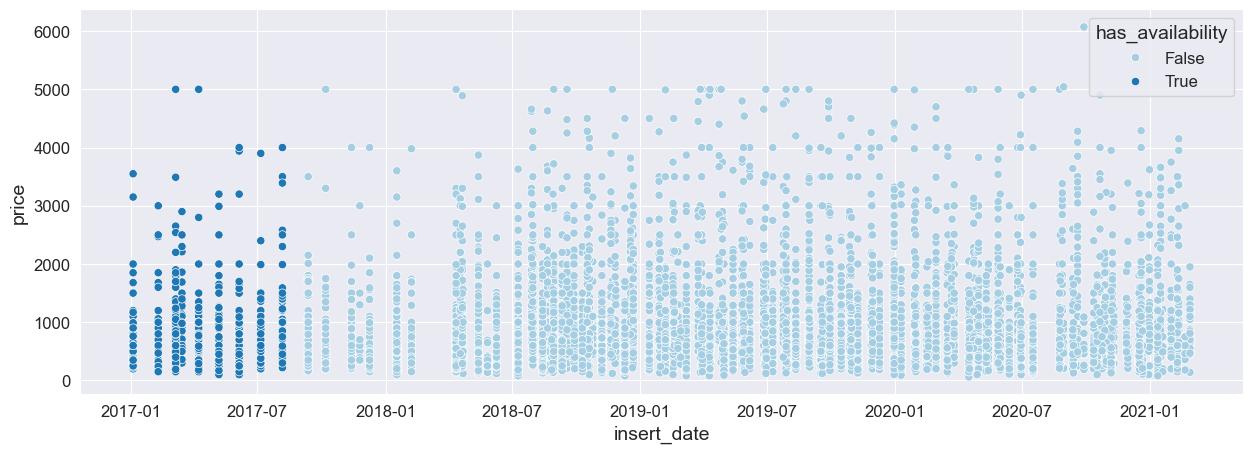

In [262]:
# distribution of has_availability values over time
plt.figure(figsize=(15,5))
sns.scatterplot(data=df_clean, x='insert_date', y='price', hue=df_clean['has_availability'].isna())
plt.show()

NaN values in `has_availability` may be due to this variable being introduced after August 2017. To simplify calculations, we can treat NaN values as 'False'.

In [263]:
# NaN -> "0", 'VERDADERO' -> "1"
df_clean['has_availability'] = np.where(df_clean['has_availability'] == 'VERDADERO', 1, 0)

df_clean['has_availability'].value_counts(dropna=False)

has_availability
1    6199
0     534
Name: count, dtype: int64

#### price
We have 121 objects without a `price`, we can **design an imputation strategy**, as price is a key value for our analysis and decision-making

First, lets investigate when we had objects with missing prices: let's see if the missing prices are more characteristic of specific days. Let's use `availability_30` to visualize this.

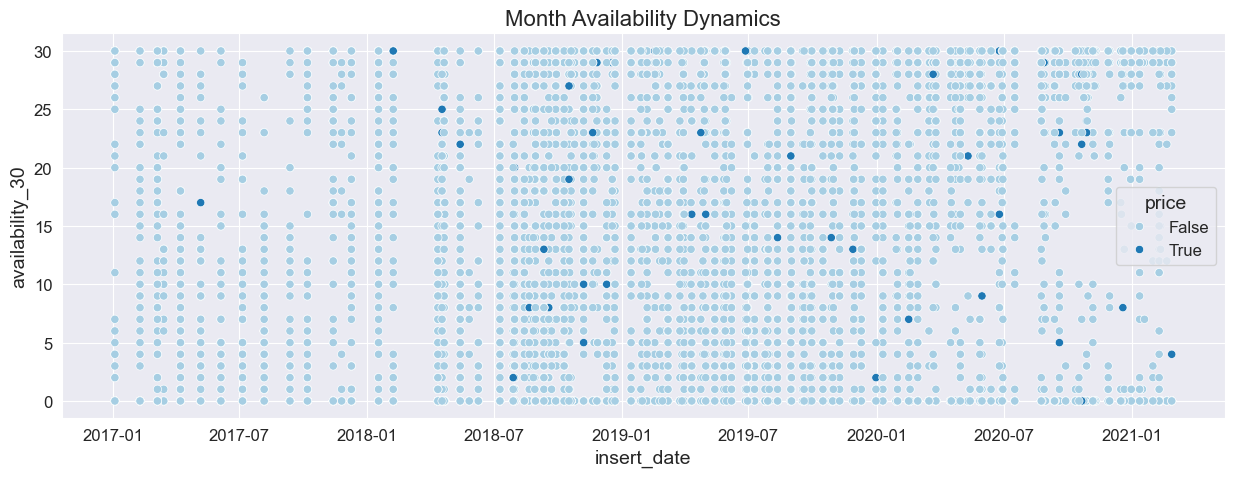

In [264]:
# availability_30 dynamics
plt.figure(figsize=(15,5))
sns.scatterplot(data=df_clean, x='insert_date', y='availability_30', hue=df_clean['price'].isna())
plt.title('Month Availability Dynamics')
plt.show()

In [265]:
print('Number of missing prices per day')
df_clean.query('price.isna()').insert_date.value_counts()

Number of missing prices per day


insert_date
2020-09-19    5
2020-05-28    5
2018-09-18    3
2020-02-29    3
2019-11-28    3
             ..
2018-04-12    1
2019-01-28    1
2019-05-27    1
2020-11-30    1
2021-02-27    1
Name: count, Length: 71, dtype: int64

Although some `insert_dates` have more than one missing price, there are no specific days with a large number of missing prices. Therefore, we can almost rule out a technical error.

Let's see if missing prices are caracteristic for specific values of different columns.

In [266]:
cols = ['host_id', 'city', 'neighbourhood_district', 'neighbourhood_name',
        'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights',
       'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'is_instant_bookable'
       ]

for col in cols:
    print()
    print(df_clean.query('price.isna()')[col].value_counts())


host_id
4459553      7
173328477    3
43337979     3
26165888     2
168692752    2
            ..
74415548     1
24708286     1
24926928     1
59485697     1
203022185    1
Name: count, Length: 103, dtype: int64

city
mallorca     61
barcelona    25
girona       15
madrid       10
menorca       4
valencia      3
sevilla       2
malaga        1
Name: count, dtype: int64

neighbourhood_district
Eixample                 12
Centro                    6
Sant Mart�                4
Ciutat Vella              3
Casco Antiguo             2
CIUTAT VELLA              2
Sants-Montju�c            2
Sarri�-Sant Gervasi       2
Gr�cia                    2
Retiro                    1
Usera                     1
San Blas - Canillejas     1
RASCANYA                  1
Salamanca                 1
Name: count, dtype: int64

neighbourhood_name
Palma de Mallorca         9
la Dreta de l'Eixample    7
Lloret de Mar             6
Pollen�a                  6
Calvi�                    6
                         

We can see that the prices are mostly missing for large and probably expensive whole apartments/houses, in half of the cases - in Mallorca. As a rule, they have high ratings, but in a large number of cases there are no reviews. Also, there is one host who has 7 missing prices, let's check them.

In [267]:
# host with 7 missing prices
df_clean.query('host_id==4459553')['city'].value_counts()

city
barcelona    25
Name: count, dtype: int64

In [268]:
df_clean.query('host_id==4459553')

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
743,3107710,1563 - AB Pla�a Espanya 2-1 - Classy 3-Bedroom...,This modish three bedroom holiday apartment in...,4459553,la Nova Esquerra de l'Eixample,Eixample,Entire home/apt,6,2.00,3.00,6.00,"TV,Internet,Wifi,Air conditioning,Kitchen,Elev...",NaN,2,330,1,9,34,64,339,11,2016-06-20,2018-08-20,800.00,80.00,90.00,80.00,80.00,90.00,80.00,1,38.00,spain,barcelona,2018-11-07
2759,13988785,1993 - AB Pla�a Espanya XI - Stylish 3-Bedroom...,This lovely apartment is situated in the centr...,4459553,la Nova Esquerra de l'Eixample,Eixample,Entire home/apt,6,1.00,3.00,6.00,"TV,Internet,Wifi,Air conditioning,Kitchen,Smok...",3500.00,3,330,1,0,0,0,69,18,2018-01-01,2019-08-17,790.00,80.00,90.00,80.00,90.00,90.00,80.00,1,8.00,spain,barcelona,2019-11-09
3033,15066661,1908 - AB Vila i Vil� Apartment 4-1 - Lovely A...,"This is a comfortable apartment in Barcelona, ...",4459553,el Poble Sec,Sants-Montju�c,Entire home/apt,6,1.00,3.00,6.00,"TV,Internet,Wifi,Air conditioning,Kitchen,Smok...",4000.00,2,330,1,13,14,40,315,34,2017-03-25,2019-11-11,800.00,80.00,80.00,80.00,80.00,90.00,80.00,1,103.00,spain,barcelona,2019-12-10
3096,15262802,1554 - AB Passeig de Gr�cia Pelai - Modern Cit...,"This spacious apartment in Barcelona, recently...",4459553,el Raval,Ciutat Vella,Entire home/apt,7,1.00,2.00,5.00,"TV,Internet,Wifi,Air conditioning,Kitchen,Elev...",NaN,3,330,1,10,23,50,306,29,2016-12-29,2018-11-19,860.00,90.00,90.00,80.00,90.00,100.00,90.00,1,122.00,spain,barcelona,2018-12-10
3196,15712249,327 - AB Central Villarroel - Trendy City Cent...,This charming two-bedroom apartment in Barcelo...,4459553,Sant Antoni,Eixample,Entire home/apt,5,1.00,2.00,3.00,"TV,Internet,Wifi,Air conditioning,Kitchen,Pets...",3500.00,3,330,1,6,17,29,304,15,2018-05-10,2019-06-17,830.00,80.00,80.00,90.00,100.00,90.00,90.00,1,105.00,spain,barcelona,2019-07-10
3847,17726001,2427 - AB Plaza Catalunya Luxury Apartment 3-4,"This luxurious, two bedroom apartment is perfe...",4459553,la Dreta de l'Eixample,Eixample,Entire home/apt,6,2.00,2.00,2.00,"TV,Wireless Internet,Air conditioning,Kitchen,...",NaN,3,1125,0,2,16,45,135,4,2017-03-27,2017-07-22,1000.00,100.00,100.00,100.00,100.00,100.00,90.00,1,9.00,spain,barcelona,2017-08-06
3849,17726179,2428 - AB Pla�a Catalunya 1-2 - Modern Apartme...,"This sleek, modern four-bedroom apartment is t...",4459553,la Dreta de l'Eixample,Eixample,Entire home/apt,10,2.00,3.00,7.00,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",NaN,3,330,1,5,24,51,317,12,2017-07-25,2018-06-30,820.00,90.00,90.00,90.00,90.00,100.00,80.00,1,76.00,spain,barcelona,2018-11-07
3869,17755675,2292 - AB Arag� Apartment 1-C - Modern Apartme...,"This chic and stylish apartment, in a recently...",4459553,l'Antiga Esquerra de l'Eixample,Eixample,Entire home/apt,6,2.00,2.00,5.00,"TV,Internet,Wifi,Air conditioning,Kitchen,Smok...",5000.00,2,330,1,3,33,61,330,15,2017-07-25,2019-03-11,870.00,90.00,90.00,90.00,90.00,90.00,80.00,1,72.00,spain,barcelona,2019-04-10
3874,17757695,2294 - AB Arag� Apartment 2-C - Central Apartm...,"This superb apartment, in a recently renovated...",4459553,l'Antiga Esquerra de l'Eixample,Eixample,Entire home/apt,6,2.00,2.00,5.00,"TV,Internet,Wifi,Air conditioning,Kitchen,Smok...",5000.00,2,330,1,27,57,87,362,18,2017-09-09,2019-03-25,810.00,90.00,90.00,90.00,90.00,90.00,80.00,1,93.00,spain,barcelona,2019-04-10
3914,17835432,2296 - AB Arag� Apartment 3-C - Stylish Apartm...,You�ll find this exceptionally-located apartme...,44595

We can see that some objects do not have prices, while similar ones do. We can assume that these are similar objects and we could later use their prices to fill in NaNs.

#### Handling Missing Prices

At the moment, we can used KNNImputer algorithm to find similar prices based on the characteristics of each accommodation, 
averaging the 5 most similar ones.

In [269]:
missing_before_imputation = df_clean['price'].isna().sum()
print("missing before imputation : ", missing_before_imputation)

missing before imputation :  121


In [270]:
# Seleccionar columnas relevantes para la imputación
features = ['accommodates', 'bedrooms', 'beds', 'bathrooms', 'review_scores_rating',
            'availability_30', 'availability_60', 'availability_90', 'availability_365', 'price']

# solo columnas numéricas
df_impute = df_clean[features].copy()

# Normalizar datos antes de usar KNNImputer
scaler = StandardScaler()
df_impute_scaled = scaler.fit_transform(df_impute)

# Crear e implementar el imputador KNN
imputer = KNNImputer(n_neighbors=5)  #  los 5 vecinos más cercanos
df_imputed_scaled = imputer.fit_transform(df_impute_scaled)

# Desescalar la columna 'price' de vuelta a su rango original
df_clean['price'] = scaler.inverse_transform(df_imputed_scaled)[:, -1]

In [271]:
# Verificar si quedan valores faltantes
missing_after_imputation = df_clean['price'].isna().sum()
print("missing after imputation : ", missing_after_imputation)

missing after imputation :  0


#### Reviews

In [272]:
df_no_reviews = df[df['number_of_reviews'] == 0]

# Count NaN values in the relevant columns for rows where number_of_reviews == 0
nan_count = df_no_reviews[['first_review_date', 'last_review_date', 'review_scores_rating', 
                           'review_scores_accuracy', 'review_scores_cleanliness', 
                           'review_scores_checkin', 'review_scores_communication', 
                           'review_scores_location', 'review_scores_value']].isna().sum()

print("NaN Count in each column for rows with number_of_reviews == 0:")
print(nan_count)


NaN Count in each column for rows with number_of_reviews == 0:
first_review_date              1251
last_review_date               1251
review_scores_rating           1251
review_scores_accuracy         1251
review_scores_cleanliness      1251
review_scores_checkin          1251
review_scores_communication    1251
review_scores_location         1251
review_scores_value            1251
dtype: int64


In [273]:
# Check unique values for each column
unique_values = df_no_reviews[['first_review_date', 'last_review_date', 'review_scores_rating', 
                               'review_scores_accuracy', 'review_scores_cleanliness', 
                               'review_scores_checkin', 'review_scores_communication', 
                               'review_scores_location', 'review_scores_value']].nunique()

print("\nUnique Values count for each column for rows with number_of_reviews == 0:")
print(unique_values)



Unique Values count for each column for rows with number_of_reviews == 0:
first_review_date              0
last_review_date               0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
dtype: int64


#### Indicator for Presence of Reviews in Accommodations

For the rows where `'number_of_reviews' == 0`, all the review-related data is missing (i.e., `NaN`). This suggests that the accommodation has no reviews.

Thus, the column `'number_of_reviews'` can be used as an indicator for the **presence or absence of reviews** for a given accommodation. If `'number_of_reviews' == 0`, this indicates that there are no reviews for that accommodation, and we can consider the review-related fields as absent.

We can use this insight to handle missing values or filter data based on the presence or absence of reviews.


In [274]:
# Filter rows where 'number_of_reviews' is not equal to 0
df_yes_reviews = df[df['number_of_reviews'] != 0]

# Count NaN values in the relevant columns for rows where 'number_of_reviews' != 0
nan_count = df_yes_reviews[['first_review_date', 'last_review_date', 'review_scores_rating', 
                            'review_scores_accuracy', 'review_scores_cleanliness', 
                            'review_scores_checkin', 'review_scores_communication', 
                            'review_scores_location', 'review_scores_value']].isna().sum()

print("NaN Count in each column for rows with number_of_reviews != 0:")
print(nan_count)

NaN Count in each column for rows with number_of_reviews != 0:
first_review_date               3
last_review_date                4
review_scores_rating           76
review_scores_accuracy         85
review_scores_cleanliness      79
review_scores_checkin          90
review_scores_communication    81
review_scores_location         91
review_scores_value            91
dtype: int64


In [275]:
# Filter rows where any of the selected columns have NaN values
df_with_nan = df_yes_reviews[df_yes_reviews[['first_review_date', 'last_review_date', 'review_scores_rating', 
                                              'review_scores_accuracy', 'review_scores_cleanliness', 
                                              'review_scores_checkin', 'review_scores_communication', 
                                              'review_scores_location', 'review_scores_value']].isna().any(axis=1)]

# Print the rows with NaN values
df_with_nan
#df_with_nan.to_csv(f'../Data/data_missed_review_scores.csv', index=False)

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
596,2368293,MAISON AU CALME AVEC PISCINE,Photos et description de la location a EMPURIA...,12100602,Castell� d'Emp�ries,NaN,Entire home/apt,6,1.00,2.00,3.00,"TV,Cable TV,Wifi,Air conditioning,Pool,Kitchen...",1270.00,2,30,VERDADERO,0,0,0,0,2,2017-04-12,2017-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSO,9.00,spain,girona,2019-02-19
734,3073348,"APARTAMENTOS AQUARIUM. 25 M2 TERRAZA, BARBACOA","Apartamento con 1 habitaci�n doble, comedor co...",14040896,Roses,NaN,Entire home/apt,4,1.00,1.00,4.00,"TV,Kitchen,Smoking allowed,Pets allowed,Free s...",520.00,3,30,VERDADERO,26,48,78,325,1,2014-07-15,2014-07-15,200.00,NaN,100.00,20.00,80.00,NaN,40.00,FALSO,2.00,spain,girona,2018-11-26
1045,4847335,"Chalet independiente, muy tranquilo","Ideal acceso a playas, naturaleza en zona, sen...",24830684,Santany�,NaN,Entire home/apt,8,3.00,4.00,6.00,"TV,Pool,Kitchen,Smoking allowed,Pets allowed,H...",1900.00,3,1125,VERDADERO,0,0,0,0,2,2015-04-28,2015-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSO,5.00,spain,mallorca,2018-07-29
1172,5486531,"Villa: TEOLUNA, Begur, Costa Brava",Beautiful house located in the urbanization re...,26281633,Begur,NaN,Entire home/apt,12,4.00,5.00,6.00,"TV,Pool,Kitchen,Free parking on premises,Heati...",2530.00,7,1125,VERDADERO,29,29,29,29,1,2017-07-22,2017-07-22,800.00,NaN,60.00,NaN,NaN,NaN,NaN,VERDADERO,7.00,spain,girona,2018-09-28
1179,5542982,Estudio Avenida de America Madrid,"Estudio con capacidad 3 personas ,2 camas dobl...",8177214,Guindalera,Salamanca,Entire home/apt,2,1.00,0.00,2.00,"TV,Internet,Wifi,Wheelchair accessible,Kitchen...",350.00,15,350,VERDADERO,24,48,78,353,1,2019-01-21,2019-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDADERO,37.00,spain,madrid,2019-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6596,25457678,Bright Room Chueca,"Nice, bright room at Chueca district. This bea...",15082341,Justicia,Centro,Private room,1,1.00,1.00,1.00,"Kitchen,Washer,Hair dryer,Laptop friendly work...",300.00,7,13,VERDADERO,0,0,0,274,1,2018-05-29,2018-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDADERO,13.00,spain,madrid,2019-01-14
6632,25619817,Apartamento en Platja D'Aro,Bonito y acogedor apartamento en la tercera pl...,34182493,Castell-Platja d'Aro,NaN,Entire home/apt,4,1.00,2.00,3.00,"Free parking on premises, Essentials, Elevator...",1000.00,7,30,VERDADERO,30,60,90,365,1,2019-01-17,2019-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDADERO,4.00,spain,girona,2020-11-28
6658,25808403,LOVELY Room in the heart of Barcelona 20% OFF,"We are two young people studying in Barcelona,...",192492855,la Dreta de l'Eixample,Eixample,Private room,3,1.00,1.00,2.00,"Wifi,Kitchen,Breakfast,Elevator,Heating,Washer...",600.00,1,1125,VERDADERO,26,49,49,49,1,2018-06-07,2018-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDADERO,10.00,spain,barcelona,2018-06-09
6727,26118283,Apartamento c�modo para 2 personas 1C,Apartamento de 60 m2 en el centro de Roses. Pr...,92855863,Roses,NaN,Entire home/apt,2,1.00,1.00,1.00,"TV,Wifi,Kitchen,Laptop friendly workspace",500.00,7,1124,VERDADERO,0,0,0,0,1,2018-12-26,2018-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDADERO,1.00,spain,girona,2019-10-30


#### Handling Missing Data for Reviews with `number_of_reviews` != 0

For the rows where `'number_of_reviews' != 0`, we can see that there are some missing (`NaN`) values in the review-related columns. These missing values need to be addressed as they represent gaps in the review data, even though the accommodation has reviews. 

Here is the count of missing values (`NaN`) for each of the relevant columns


In [276]:
df_with_nan['apartment_id'].value_counts().head(5)

apartment_id
19402970    2
6257970     2
2368293     1
19871929    1
21912770    1
Name: count, dtype: int64

In [277]:
df[df['apartment_id'] == 19402970]

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
4579,19402970,Villa Oliver,In kurzer Entfernung der sch�nsten Str�nde der...,2221389,Santany�,NaN,Entire home/apt,8,2.00,3.00,6.00,"TV,Wifi,Air conditioning,Pool,Kitchen,Free par...",2500.00,7,1125,VERDADERO,0,0,26,301,1,2019-03-30,2019-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSO,16.00,spain,mallorca,2019-09-28
4580,19402970,Villa Oliver,In kurzer Entfernung der sch�nsten Str�nde der...,2221389,Santany�,NaN,Entire home/apt,7,2.00,3.00,4.00,"TV,Wifi,Air conditioning,Pool,Kitchen,Free par...",2500.00,7,1125,VERDADERO,29,49,79,354,1,2019-03-30,2019-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSO,7.00,spain,mallorca,2020-06-25


In [278]:
df[df['apartment_id'] == 6257970]

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
1306,6257970,�tico con terraza privada,fant�stico �tico con terraza soleada en el cen...,32262478,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,1.00,1.00,1.00,"Essentials, Wifi, Kitchen, Elevator, TV, First...",700.00,1,1125,VERDADERO,0,0,0,0,1,2015-05-15,2015-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDADERO,1.00,spain,barcelona,2020-11-06
1307,6257970,�tico con terraza privada,fant�stico �tico con terraza soleada en el cen...,32262478,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,1.00,1.00,1.00,"TV,Internet,Wifi,Wheelchair accessible,Kitchen...",700.00,1,1125,VERDADERO,0,0,0,0,1,2015-05-15,2015-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDADERO,2.00,spain,barcelona,2020-01-10


<div class="alert alert-info"> 
<b>Comment</b> 

reviews_per_month for now I can´t understand this field
(see examples above)
    
</div>

### Standardization

In string columns (`name`, `description`, `neighbourhood_name`, `neighbourhood_district`)  we have presence of � (replacement characters for Spanish accents: á, é, í, ó, ú, ñ).

In [279]:
# columns containing � 
for col in df.loc[:, df.dtypes == 'object'].columns:
    print(col, df[col].str.contains('�').sum())

name 1391
description 4769
neighbourhood_name 1541
neighbourhood_district 1003
room_type 0
amenities_list 891
has_availability 0
is_instant_bookable 0
country 0
city 0


#### City and Neighbourhood Standardization

In [280]:
raw_text="""original_city,original_neighbourhood,standardized_city,standardized_neighbourhood,autonomous_community
malaga,Centro,Málaga,Centro,Andalucía
madrid,C�rmenes,Madrid,Los Cármenes,Comunidad de Madrid
sevilla,San Vicente,Sevilla,San Vicente,Andalucía
barcelona,"l'Antiga Esquerra de l'Eixample",Barcelona,"L'Antiga Esquerra de l'Eixample",Cataluña
girona,Quart,Girona,Quart,Cataluña
girona,Torroella de Fluvi�,Girona,Torroella de Fluvià,Cataluña
barcelona,"el Camp de l'Arpa del Clot",Barcelona,"El Camp de l'Arpa del Clot",Cataluña
barcelona,"la Dreta de l'Eixample",Barcelona,"La Dreta de l'Eixample",Cataluña
madrid,Embajadores,Madrid,Embajadores,Comunidad de Madrid
barcelona,"el Camp d'en Grassot i Gr�cia Nova",Barcelona,"El Camp d'en Grassot i Gràcia Nova",Cataluña
barcelona,"el Raval",Barcelona,"El Raval",Cataluña
barcelona,"el Fort Pienc",Barcelona,"El Fort Pienc",Cataluña
madrid,Palacio,Madrid,Palacio,Comunidad de Madrid
madrid,"Palomeras Bajas",Madrid,"Palomeras Bajas",Comunidad de Madrid
girona,"Lloret de Mar",Girona,"Lloret de Mar",Cataluña
valencia,"EL PILAR",Valencia,"El Pilar",Comunidad Valenciana
barcelona,"Vallvidrera, el Tibidabo i les Planes",Barcelona,"Vallvidrera, el Tibidabo i les Planes",Cataluña
barcelona,Sants,Barcelona,Sants,Cataluña
barcelona,"Sant Antoni",Barcelona,"Sant Antoni",Cataluña
girona,Forallac,Girona,Forallac,Cataluña
barcelona,"les Corts",Barcelona,"Les Corts",Cataluña
mallorca,"Palma de Mallorca",Palma,"Palma de Mallorca",Islas Baleares
madrid,Universidad,Madrid,Universidad,Comunidad de Madrid
mallorca,Alc�dia,Palma,Alcúdia,Islas Baleares
madrid,Justicia,Madrid,Justicia,Comunidad de Madrid
barcelona,Horta,Barcelona,Horta,Cataluña
barcelona,"Sant Pere, Santa Caterina i la Ribera",Barcelona,"Sant Pere, Santa Caterina i la Ribera",Cataluña
barcelona,"el Poble Sec",Barcelona,"El Poble Sec",Cataluña
valencia,"EN CORTS",Valencia,"En Corts",Comunidad Valenciana
girona,Capmany,Girona,Capmany,Cataluña
madrid,Aluche,Madrid,Aluche,Comunidad de Madrid
girona,"Castell� d'Emp�ries",Girona,"Castelló d'Empúries",Cataluña
barcelona,"Can Peguera",Barcelona,"Can Peguera",Cataluña
madrid,Cortes,Madrid,Cortes,Comunidad de Madrid
madrid,"Ciudad Jard�n",Madrid,"Ciudad Jardín",Comunidad de Madrid
barcelona,"la Vila de Gr�cia",Barcelona,"La Vila de Gràcia",Cataluña
barcelona,"la Nova Esquerra de l'Eixample",Barcelona,"La Nova Esquerra de l'Eixample",Cataluña
madrid,"Ni�o Jes�s",Madrid,"Niño Jesús",Comunidad de Madrid
madrid,Sol,Madrid,Sol,Comunidad de Madrid
valencia,RUSSAFA,Valencia,Russafa,Comunidad Valenciana
barcelona,"Vilapicina i la Torre Llobeta",Barcelona,"Vilapicina i la Torre Llobeta",Cataluña
sevilla,Arenal,Sevilla,Arenal,Andalucía
girona,Begur,Girona,Begur,Cataluña
mallorca,Selva,Palma,Selva,Islas Baleares
sevilla,Alfalfa,Sevilla,Alfalfa,Andalucía
barcelona,"la Sagrada Fam�lia",Barcelona,"La Sagrada Família",Cataluña
mallorca,"Santa Margalida",Palma,"Santa Margalida",Islas Baleares
valencia,"EL CARME",Valencia,"El Carme",Comunidad Valenciana
girona,"Tossa de Mar",Girona,"Tossa de Mar",Cataluña
barcelona,"el Putxet i el Farr�",Barcelona,"El Putxet i el Farró",Cataluña
barcelona,"el Barri G�tic",Barcelona,"El Barri Gòtic",Cataluña
menorca,"Es Mercadal",Menorca,"Es Mercadal",Islas Baleares
barcelona,"el Poblenou",Barcelona,"El Poblenou",Cataluña
mallorca,Campos,Palma,Campos,Islas Baleares
mallorca,S�ller,Palma,Sóller,Islas Baleares
menorca,"Ciutadella de Menorca",Menorca,Ciutadella,Islas Baleares
mallorca,Valldemossa,Palma,Valldemossa,Islas Baleares
barcelona,"la Font de la Guatlla",Barcelona,"La Font de la Guatlla",Cataluña
sevilla,"Los Remedios",Sevilla,"Los Remedios",Andalucía
mallorca,Santany�,Palma,Santanyí,Islas Baleares
barcelona,"la Vila Ol�mpica del Poblenou",Barcelona,"La Vila Olímpica del Poblenou",Cataluña
barcelona,"el Coll",Barcelona,"El Coll",Cataluña
madrid,"San Ferm�n",Madrid,"San Fermín",Comunidad de Madrid
madrid,Comillas,Madrid,Comillas,Comunidad de Madrid
madrid,Prosperidad,Madrid,Prosperidad,Comunidad de Madrid
madrid,Acacias,Madrid,Acacias,Comunidad de Madrid
mallorca,Llub�,Palma,Llubí,Islas Baleares
girona,Roses,Girona,Roses,Cataluña
valencia,"LA SEU",Valencia,"La Seu",Comunidad Valenciana
barcelona,"el Parc i la Llacuna del Poblenou",Barcelona,"El Parc i la Llacuna del Poblenou",Cataluña
madrid,"Cuatro Caminos",Madrid,"Cuatro Caminos",Comunidad de Madrid
sevilla,"San Juli�n",Sevilla,"San Julián",Andalucía
girona,Palafrugell,Girona,Palafrugell,Cataluña
barcelona,"la Prosperitat",Barcelona,"La Prosperitat",Cataluña
barcelona,"el Clot",Barcelona,"El Clot",Cataluña
barcelona,"les Tres Torres",Barcelona,"Les Tres Torres",Cataluña
madrid,"Pinar del Rey",Madrid,"Pinar del Rey",Comunidad de Madrid
barcelona,"Vallcarca i els Penitents",Barcelona,"Vallcarca i els Penitents",Cataluña
madrid,"Los Angeles",Madrid,"Los Ángeles",Comunidad de Madrid
sevilla,"San Bartolom�",Sevilla,"San Bartolomé",Andalucía
mallorca,Inca,Palma,Inca,Islas Baleares
sevilla,"Tabladilla, La Estrella",Sevilla,"Tabladilla, La Estrella",Andalucía
menorca,Alaior,Menorca,Alaior,Islas Baleares
mallorca,Calvi�,Palma,Calvià,Islas Baleares
malaga,"Cruz De Humilladero",Málaga,"Cruz de Humilladero",Andalucía
malaga,Este,Málaga,Este,Andalucía
mallorca,Costitx,Palma,Costitx,Islas Baleares
sevilla,"an Roque",Sevilla,"San Roque",Andalucía
sevilla,"Santa Cruz",Sevilla,"Santa Cruz",Andalucía
girona,"Sant Climent Sescebes",Girona,"Sant Climent Sescebes",Cataluña
valencia,ARRANCAPINS,Valencia,Arrancapins,Comunidad Valenciana
madrid,Portazgo,Madrid,Portazgo,Comunidad de Madrid
madrid,"Palos de Moguer",Madrid,"Palos de Moguer",Comunidad de Madrid
mallorca,Pollen�a,Palma,Pollença,Islas Baleares
madrid,Recoletos,Madrid,Recoletos,Comunidad de Madrid
madrid,Castilla,Madrid,Castilla,Comunidad de Madrid
madrid,Legazpi,Madrid,Legazpi,Comunidad de Madrid
sevilla,Feria,Sevilla,Feria,Andalucía
sevilla,"San Lorenzo",Sevilla,"San Lorenzo",Andalucía
girona,Girona,Girona,Girona,Cataluña
mallorca,"Ses Salines",Palma,"Ses Salines",Islas Baleares
barcelona,"la Salut",Barcelona,"La Salut",Cataluña
sevilla,Museo,Sevilla,Museo,Andalucía
sevilla,"Encarnaci�n, Regina",Sevilla,"Encarnación, Regina",Andalucía
girona,Cadaqu�s,Girona,Cadaqués,Cataluña
mallorca,Manacor,Palma,Manacor,Islas Baleares
menorca,Mah�n,Menorca,Mahón,Islas Baleares
mallorca,Felanitx,Palma,Felanitx,Islas Baleares
girona,"L'Escala",Girona,"L'Escala",Cataluña
barcelona,"la Barceloneta",Barcelona,"La Barceloneta",Cataluña
valencia,"LA ROQUETA",Valencia,"La Roqueta",Comunidad Valenciana
mallorca,Puigpunyent,Palma,Puigpunyent,Islas Baleares
mallorca,Lloseta,Palma,Lloseta,Islas Baleares
barcelona,Sarri�,Barcelona,Sarrià,Cataluña
mallorca,Petra,Palma,Petra,Islas Baleares
girona,Palam�s,Girona,Palamós,Cataluña
malaga,"Carretera de Cadiz",Málaga,"Carretera de Cádiz",Andalucía
madrid,"Ciudad Universitaria",Madrid,"Ciudad Universitaria",Comunidad de Madrid
girona,Celr�,Girona,Celrà,Cataluña
mallorca,Llucmajor,Palma,Llucmajor,Islas Baleares
mallorca,Algaida,Palma,Algaida,Islas Baleares
madrid,Valdeacederas,Madrid,Valdeacederas,Comunidad de Madrid
girona,"Castell-Platja d'Aro",Girona,"Castell-Platja d'Aro",Cataluña
sevilla,"San Bernardo",Sevilla,"San Bernardo",Andalucía
girona,Cabanelles,Girona,Cabanelles,Cataluña
girona,"Torroella de Montgr�",Girona,"Torroella de Montgrí",Cataluña
barcelona,"Can Bar�",Barcelona,"Can Baró",Cataluña
barcelona,"Sant Gervasi - la Bonanova",Barcelona,"Sant Gervasi - la Bonanova",Cataluña
madrid,Arg�elles,Madrid,Argüelles,Comunidad de Madrid
sevilla,"Triana Casco Antiguo",Sevilla,"Triana Casco Antiguo",Andalucía
mallorca,Campanet,Palma,Campanet,Islas Baleares
madrid,Trafalgar,Madrid,Trafalgar,Comunidad de Madrid
mallorca,Fornalutx,Palma,Fornalutx,Islas Baleares
girona,"La Selva de Mar",Girona,"La Selva de Mar",Cataluña
girona,Llan��,Girona,Llançà,Cataluña
valencia,MORVEDRE,Valencia,Morvedre,Comunidad Valenciana
madrid,Pac�fico,Madrid,Pacífico,Comunidad de Madrid
barcelona,"Proven�als del Poblenou",Barcelona,"Provençals del Poblenou",Cataluña
barcelona,"Sants - Badal",Barcelona,"Sants-Badal",Cataluña
barcelona,"el Carmel",Barcelona,"El Carmel",Cataluña
valencia,"PENYA-ROJA",Valencia,"Penya-Roja",Comunidad Valenciana
mallorca,Marratx�,Palma,Marratxí,Islas Baleares
madrid,"Vista Alegre",Madrid,"Vista Alegre",Comunidad de Madrid
valencia,"LA CARRASCA",Valencia,"La Carrasca",Comunidad Valenciana
girona,"Sant Feliu de Gu�xols",Girona,"Sant Feliu de Guíxols",Cataluña
barcelona,"Diagonal Mar i el Front Mar�tim del Poblenou",Barcelona,"Diagonal Mar i el Front Marítim del Poblenou",Cataluña
sevilla,"San Gil",Sevilla,"San Gil",Andalucía
barcelona,"Sant Gervasi - Galvany",Barcelona,"Sant Gervasi - Galvany",Cataluña
madrid,"El Viso",Madrid,"El Viso",Comunidad de Madrid
barcelona,"la Marina del Prat Vermell",Barcelona,"La Marina del Prat Vermell",Cataluña
valencia,"EL CALVARI",Valencia,"El Calvario",Comunidad Valenciana
madrid,Goya,Madrid,Goya,Comunidad de Madrid
barcelona,"la Bordeta",Barcelona,"La Bordeta",Cataluña
malaga,"Palma-Palmilla",Málaga,"Palma-Palmilla",Andalucía
madrid,Atocha,Madrid,Atocha,Comunidad de Madrid
girona,Blanes,Girona,Blanes,Cataluña
mallorca,"Santa Mar�a del Cam�",Palma,"Santa María del Camí",Islas Baleares
mallorca,Escorca,Palma,Escorca,Islas Baleares
madrid,Almenara,Madrid,Almenara,Comunidad de Madrid
girona,Pont�s,Girona,Pontós,Cataluña
sevilla,"Le�n XIII, Los Naranjos",Sevilla,"León XIII, Los Naranjos",Andalucía
mallorca,"Sant Lloren� des Cardassar",Palma,"Sant Llorenç des Cardassar",Islas Baleares
menorca,"Sant Llu�s",Menorca,"Sant Lluís",Islas Baleares
madrid,Lista,Madrid,Lista,Comunidad de Madrid
sevilla,"San Pablo A y B",Sevilla,"San Pablo",Andalucía
girona,"La Vall de Bianya",Girona,"La Vall de Bianya",Cataluña
barcelona,"la Marina de Port",Barcelona,"La Marina de Port",Cataluña
barcelona,Pedralbes,Barcelona,Pedralbes,Cataluña
malaga,Churriana,Málaga,Churriana,Andalucía
barcelona,"Sant Gen�s dels Agudells",Barcelona,"Sant Genís dels Agudells",Cataluña
mallorca,Art�,Palma,Artà,Islas Baleares
girona,Ripoll,Girona,Ripoll,Cataluña
barcelona,"el Baix Guinard�",Barcelona,"El Baix Guinardó",Cataluña
girona,Albons,Girona,Albons,Cataluña
girona,Calonge,Girona,Calonge,Cataluña
girona,Tortell�,Girona,Tortellà,Cataluña
girona,Ordis,Girona,Ordis,Cataluña
mallorca,Muro,Palma,Muro,Islas Baleares
mallorca,Alar�,Palma,Alaró,Islas Baleares
mallorca,"Son Servera",Palma,"Son Servera",Islas Baleares
barcelona,"la Maternitat i Sant Ramon",Barcelona,"La Maternitat i Sant Ramon",Cataluña
madrid,"Rios Rosas",Madrid,"Ríos Rosas",Comunidad de Madrid
mallorca,"Lloret de Vistalegre",Palma,"Lloret de Vistalegre",Islas Baleares
valencia,"LA GRAN VIA",Valencia,"La Gran Vía",Comunidad Valenciana
mallorca,Capdepera,Palma,Capdepera,Islas Baleares
madrid,"Hispanoam�rica",Madrid,"Hispanoamérica",Comunidad de Madrid
girona,"Cornell� del Terri",Girona,"Cornellà del Terri",Cataluña
mallorca,Esporles,Palma,Esporles,Islas Baleares
sevilla,"Pedro Salvador, Las Palmeritas",Sevilla,"Pedro Salvador, Las Palmeritas",Andalucía
valencia,AIORA,Valencia,Aiora,Comunidad Valenciana
mallorca,B�ger,Palma,Búger,Islas Baleares
girona,Llad�,Girona,Lladó,Cataluña
girona,"Palau de Santa Eul�lia",Girona,"Palau de Santa Eulàlia",Cataluña
sevilla,"Giralda Sur",Sevilla,"Giralda Sur",Andalucía
barcelona,"la Verneda i la Pau",Barcelona,"La Verneda i la Pau",Cataluña
madrid,Delicias,Madrid,Delicias,Comunidad de Madrid
malaga,"Teatinos-Universidad",Málaga,"Teatinos-Universidad",Andalucía
girona,Vilademuls,Girona,Vilademuls,Cataluña
girona,Figueres,Girona,Figueres,Cataluña
sevilla,"Ciudad Jard�n",Sevilla,"Ciudad Jardín",Andalucía
girona,Pals,Girona,Pals,Cataluña
barcelona,"el Congr�s i els Indians",Barcelona,"El Congrés i els Indians",Cataluña
madrid,Castillejos,Madrid,Castillejos,Comunidad de Madrid
barcelona,"el Bes�s i el Maresme",Barcelona,"El Besòs i el Maresme",Cataluña
madrid,Almagro,Madrid,Almagro,Comunidad de Madrid
madrid,Imperial,Madrid,Imperial,Comunidad de Madrid
valencia,MESTALLA,Valencia,Mestalla,Comunidad Valenciana
valencia,"EL PLA DEL REMEI",Valencia,"El Pla del Remei",Comunidad Valenciana
madrid,Castellana,Madrid,Castellana,Comunidad de Madrid
valencia,"EL MERCAT",Valencia,"El Mercat",Comunidad Valenciana
madrid,Ibiza,Madrid,Ibiza,Comunidad de Madrid
valencia,"LA MALVA-ROSA",Valencia,"La Malva-Rosa",Comunidad Valenciana
mallorca,Dey�,Palma,Deià,Islas Baleares
madrid,Simancas,Madrid,Simancas,Comunidad de Madrid
barcelona,Montbau,Barcelona,Montbau,Cataluña
mallorca,Binissalem,Palma,Binissalem,Islas Baleares
madrid,"Casco Hist�rico de Vallecas",Madrid,Vallecas,Comunidad de Madrid
valencia,"LA XEREA",Valencia,"La Xerea",Comunidad Valenciana
valencia,CAMPANAR,Valencia,Campanar,Comunidad Valenciana
girona,Alp,Girona,Alp,Cataluña
sevilla,"Cruz Roja, Capuchinos",Sevilla,"Cruz Roja, Capuchinos",Andalucía
madrid,Ventas,Madrid,Ventas,Comunidad de Madrid
sevilla,"Carretera de Carmona, Mar�a Auxiliadora, Fontanal",Sevilla,"Carretera de Carmona, María Auxiliadora, Fontanal",Andalucía
valencia,"SANT FRANCESC",Valencia,"Sant Francesc",Comunidad Valenciana
barcelona,Hostafrancs,Barcelona,Hostafrancs,Cataluña
barcelona,"la Vall d'Hebron",Barcelona,"La Vall d'Hebron",Cataluña
valencia,"LA RAIOSA",Valencia,"La Raiosa",Comunidad Valenciana
madrid,"Pueblo Nuevo",Madrid,"Pueblo Nuevo",Comunidad de Madrid
sevilla,"Palacio Congresos, Urbadiez, Entrepuentes, Jardines del Eden",Sevilla,"Palacio de Congresos, Urbadiez, Entrepuentes, Jardines del Eden",Andalucía
girona,"Palau-sator",Girona,"Palau-sator",Cataluña
girona,Fontanilles,Girona,Fontanilles,Cataluña
mallorca,"Sa Pobla",Palma,"Sa Pobla",Islas Baleares
madrid,Abrantes,Madrid,Abrantes,Comunidad de Madrid
madrid,Gaztambide,Madrid,Gaztambide,Comunidad de Madrid
girona,Ur�s,Girona,Urús,Cataluña
girona,Llers,Girona,Llers,Cataluña
girona,"Sant Mori",Girona,"Sant Mori",Cataluña
girona,Madremanya,Girona,Madremanya,Cataluña
barcelona,Navas,Barcelona,Navas,Cataluña
girona,Pardines,Girona,Pardines,Cataluña
girona,"Sant Mart� Vell",Girona,"Sant Martí Vell",Cataluña
madrid,"San Diego",Madrid,"San Diego",Comunidad de Madrid
madrid,Guindalera,Madrid,Guindalera,Comunidad de Madrid
girona,Vila�r,Girona,Vilaür,Cataluña
girona,Vidr�,Girona,Vidré,Cataluña
madrid,"San Pascual",Madrid,"San Pascual",Comunidad de Madrid
mallorca,"Maria de la Salut",Palma,"Maria de la Salut",Islas Baleares
valencia,"CIUTAT UNIVERSITARIA",Valencia,"Ciutat Universitària",Comunidad Valenciana
valencia,"MONT-OLIVET",Valencia,"Mont-Olivet",Comunidad Valenciana
valencia,"SANT ANTONI",Valencia,"Sant Antoni",Comunidad Valenciana
barcelona,"Sant Mart� de Proven�als",Barcelona,"Sant Martí de Provençals",Cataluña
girona,"Sant Jordi Desvalls",Girona,"Sant Jordi Desvalls",Cataluña
girona,"Sant Feliu de Buixalleu",Girona,"Sant Feliu de Buixalleu",Cataluña
barcelona,"el Guinard�",Barcelona,"El Guinardó",Cataluña
madrid,Valdefuentes,Madrid,Valdefuentes,Comunidad de Madrid
madrid,Concepci�n,Madrid,Concepción,Comunidad de Madrid
valencia,"EL BOTANIC",Valencia,"El Botànic",Comunidad Valenciana
sevilla,"La Buhaira",Sevilla,"La Buhaira",Andalucía
girona,Bescan�,Girona,Bescanó,Cataluña
madrid,Jer�nimos,Madrid,Jerónimos,Comunidad de Madrid
sevilla,"Triana Este",Sevilla,"Triana Este",Andalucía
madrid,"Casa de Campo",Madrid,"Casa de Campo",Comunidad de Madrid
barcelona,"Ciutat Meridiana",Barcelona,"Ciutat Meridiana",Cataluña
barcelona,"la Teixonera",Barcelona,"La Teixonera",Cataluña
madrid,Numancia,Madrid,Numancia,Comunidad de Madrid
girona,Masarac,Girona,Masarac,Cataluña
girona,Vidreres,Girona,Vidreres,Cataluña
girona,"Sant Ferriol",Girona,"Sant Ferriol",Cataluña
girona,"Ribes de Freser",Girona,"Ribes de Freser",Cataluña
madrid,Moscard�,Madrid,Moscardó,Comunidad de Madrid
mallorca,Consell,Palma,Consell,Islas Baleares
valencia,BENIMACLET,Valencia,Benimaclet,Comunidad Valenciana
girona,Vilabertran,Girona,Vilabertran,Cataluña
valencia,"CABANYAL-CANYAMELAR",Valencia,"Cabanyal-Canyamelar",Comunidad Valenciana
madrid,Vallehermoso,Madrid,Vallehermoso,Comunidad de Madrid
madrid,Vinateros,Madrid,Vinateros,Comunidad de Madrid
sevilla,"Doctor Barraquer, G. Renfe, Policl�nico",Sevilla,"Doctor Barraquer, G. Renfe, Policlínico",Andalucía
girona,Campelles,Girona,Campelles,Cataluña
madrid,Canillas,Madrid,Canillas,Comunidad de Madrid
madrid,"Puerta del Angel",Madrid,"Puerta del Ángel",Comunidad de Madrid
mallorca,Andratx,Palma,Andratx,Islas Baleares
barcelona,Verdun,Barcelona,Verdun,Cataluña
girona,"El Port de la Selva",Girona,"El Port de la Selva",Cataluña
girona,"Santa Cristina d'Aro",Girona,"Santa Cristina d'Aro",Cataluña
girona,Seriny�,Girona,Serinyà,Cataluña
girona,Banyoles,Girona,Banyoles,Cataluña
malaga,"Bailen-Miraflores",Málaga,"Bailén-Miraflores",Andalucía
girona,"Cru�lles, Monells i Sant Sadurn� de l'Heura",Girona,"Cru�lles, Monells i Sant Sadurní de l'Heura",Cataluña
girona,"Montagut i Oix",Girona,"Montagut i Oix",Cataluña
mallorca,Montu�ri,Palma,Montuïri,Islas Baleares
girona,Olot,Girona,Olot,Cataluña
barcelona,"el Tur� de la Peira",Barcelona,"El Turó de la Peira",Cataluña
sevilla,"Santa Catalina",Sevilla,"Santa Catalina",Andalucía
barcelona,"la Guineueta",Barcelona,"La Guineueta",Cataluña
girona,Ventall�,Girona,Ventalló,Cataluña
madrid,Arapiles,Madrid,Arapiles,Comunidad de Madrid
barcelona,Porta,Barcelona,Porta,Cataluña
madrid,Palomas,Madrid,Palomas,Comunidad de Madrid
mallorca,"Mancor de la Vall",Palma,"Mancor de la Vall",Islas Baleares
madrid,Fontarr�n,Madrid,Fontarrón,Comunidad de Madrid
girona,Camprodon,Girona,Camprodon,Cataluña
sevilla,"Colores, Entreparques",Sevilla,"Colores, Entreparques",Andalucía
madrid,Chopera,Madrid,Chopera,Comunidad de Madrid
sevilla,"Pio XII",Sevilla,"Pío XII",Andalucía
valencia,MARXALENES,Valencia,Marxalenes,Comunidad Valenciana
madrid,Campamento,Madrid,Campamento,Comunidad de Madrid
madrid,Pilar,Madrid,Pilar,Comunidad de Madrid
valencia,"CIUTAT JARDI",Valencia,"Ciutat Jardí",Comunidad Valenciana
mallorca,Sineu,Palma,Sineu,Islas Baleares
sevilla,"La Florida",Sevilla,"La Florida",Andalucía
madrid,Quintana,Madrid,Quintana,Comunidad de Madrid
madrid,"San Andr�s",Madrid,"San Andrés",Comunidad de Madrid
madrid,"Alameda de Osuna",Madrid,"Alameda de Osuna",Comunidad de Madrid
girona,"La Bisbal d'Emporda",Girona,"La Bisbal d'Empordà",Cataluña
girona,Peralada,Girona,Peralada,Cataluña
madrid,Valdezarza,Madrid,Valdezarza,Comunidad de Madrid
barcelona,"el Bon Pastor",Barcelona,"El Bon Pastor",Cataluña
sevilla,"Huerta de la Salud",Sevilla,"Huerta de la Salud",Andalucía
mallorca,Sencelles,Palma,Sencelles,Islas Baleares
madrid,"Fuente del Berro",Madrid,"Fuente del Berro",Comunidad de Madrid
sevilla,"El Roc�o",Sevilla,"El Rocío",Andalucía
sevilla,"Triana Oeste",Sevilla,"Triana Oeste",Andalucía
madrid,"Puerta Bonita",Madrid,"Puerta Bonita",Comunidad de Madrid
mallorca,Ariany,Palma,Ariany,Islas Baleares
madrid,Berruguete,Madrid,Berruguete,Comunidad de Madrid
valencia,"ELS ORRIOLS",Valencia,"Els Orriols",Comunidad Valenciana
valencia,PATRAIX,Valencia,Patraix,Comunidad Valenciana
madrid,Adelfas,Madrid,Adelfas,Comunidad de Madrid
madrid,"San Juan Bautista",Madrid,"San Juan Bautista",Comunidad de Madrid
madrid,Piovera,Madrid,Piovera,Comunidad de Madrid
girona,"Sant Pere Pescador",Girona,"Sant Pere Pescador",Cataluña
valencia,"NOU MOLES",Valencia,"Nou Moles",Comunidad Valenciana
girona,Sils,Girona,Sils,Cataluña
girona,Amer,Girona,Amer,Cataluña
madrid,"La Paz",Madrid,"La Paz",Comunidad de Madrid
girona,"Bellcaire d'Empord�",Girona,"Bellcaire d'Empordà",Cataluña
madrid,"Bellas Vistas",Madrid,"Bellas Vistas",Comunidad de Madrid
sevilla,Nervi�n,Sevilla,Nervión,Andalucía
menorca,"Es Castell",Menorca,"Es Castell",Islas Baleares
madrid,"Palomeras Sureste",Madrid,"Palomeras Sureste",Comunidad de Madrid
mallorca,"Santa Eug�nia",Palma,"Santa Eugènia",Islas Baleares
sevilla,"El Carmen",Sevilla,"El Carmen",Andalucía
mallorca,Bunyola,Palma,Bunyola,Islas Baleares
valencia,"EL PERELLONET",Valencia,"El Perellonet",Comunidad Valenciana
malaga,"Ciudad Jardin",Málaga,"Ciudad Jardín",Andalucía
madrid,Almendrales,Madrid,Almendrales,Comunidad de Madrid
valencia,FAVARA,Valencia,Favara,Comunidad Valenciana
madrid,Buenavista,Madrid,Buenavista,Comunidad de Madrid
mallorca,Banyalbufar,Palma,Banyalbufar,Islas Baleares
girona,Aiguaviva,Girona,Aiguaviva,Cataluña
girona,Besal�,Girona,Besalú,Cataluña
madrid,"Nueva Espa�a",Madrid,"Nueva España",Comunidad de Madrid
girona,Jafre,Girona,Jafre,Cataluña
mallorca,"Vilafranc de Bonany",Palma,"Vilafranca de Bonany",Islas Baleares
madrid,Costillares,Madrid,Costillares,Comunidad de Madrid
girona,"L'Armentera",Girona,"L'Armentera",Cataluña
girona,Ull�,Girona,Ullà,Cataluña
valencia,"VARA DE QUART",Valencia,"Vara de Quart",Comunidad Valenciana
madrid,Valverde,Madrid,Valverde,Comunidad de Madrid
valencia,BENICALAP,Valencia,Benicalap,Comunidad Valenciana
madrid,Mirasierra,Madrid,Mirasierra,Comunidad de Madrid
girona,"Sales de Llierca",Girona,"Sales de Llierca",Cataluña
girona,Saus,Girona,Saus,Cataluña
madrid,Pe�agrande,Madrid,Peñagrande,Comunidad de Madrid
girona,Osor,Girona,Osor,Cataluña
madrid,"Casco Hist�rico de Barajas",Madrid,Barajas,Comunidad de Madrid
barcelona,Vallbona,Barcelona,Vallbona,Cataluña
valencia,"SANT LLORENS",Valencia,"Sant Llorenç",Comunidad Valenciana
girona,Vilamaniscle,Girona,Vilamaniscle,Cataluña
sevilla,"San Jos� Obrero",Sevilla,"San José Obrero",Andalucía
sevilla,"La Palmilla, Doctor Mara��n",Sevilla,"La Palmilla, Doctor Marañón",Andalucía
madrid,Aguilas,Madrid,Águilas,Comunidad de Madrid
valencia,NATZARET,Valencia,Nazaret,Comunidad Valenciana
sevilla,"Barrio Le�n",Sevilla,"Barrio León",Andalucía
malaga,"Puerto de la Torre",Málaga,"Puerto de la Torre",Andalucía
girona,"Fontanals de Cerdanya",Girona,"Fontanals de Cerdanya",Cataluña
girona,"Riells i Viabrea",Girona,"Riells i Viabrea",Cataluña
barcelona,"la Sagrera",Barcelona,"La Sagrera",Cataluña
madrid,Butarque,Madrid,Butarque,Comunidad de Madrid
girona,Bolvir,Girona,Bolvir,Cataluña
barcelona,"Sant Andreu",Barcelona,"Sant Andreu",Cataluña
madrid,Canillejas,Madrid,Canillejas,Comunidad de Madrid
girona,"Les Llosses",Girona,"Les Llosses",Cataluña
girona,Puigcerd�,Girona,Puigcerdà,Cataluña
sevilla,"El Tard�n, El Carmen",Sevilla,"El Tardón, El Carmen",Andalucía
madrid,Hell�n,Madrid,Hellín,Comunidad de Madrid
girona,"Santa Pau",Girona,"Santa Pau",Cataluña
girona,"Sant Joan de les Abadesses",Girona,"Sant Joan de les Abadesses",Cataluña
valencia,"CIUTAT FALLERA",Valencia,"Ciutat Fallera",Comunidad Valenciana
madrid,Opa�el,Madrid,Opáñel,Comunidad de Madrid
girona,"Sant Mart� de Ll�mena",Girona,"Sant Martí de Llémena",Cataluña
valencia,"LA PETXINA",Valencia,"La Petxina",Comunidad Valenciana
valencia,FAITANAR,Valencia,Faitanar,Comunidad Valenciana
sevilla,"El Cerro",Sevilla,"El Cerro",Andalucía
barcelona,"la Font d'en Fargues",Barcelona,"La Font d'en Fargues",Cataluña
valencia,"L'HORT DE SENABRE",Valencia,"L'Hort de Senabre",Comunidad Valenciana
barcelona,"les Roquetes",Barcelona,"Les Roquetes",Cataluña
madrid,Arcos,Madrid,Arcos,Comunidad de Madrid
valencia,BENIMAMET,Valencia,Benimamet,Comunidad Valenciana
girona,Foix�,Girona,Foixà,Cataluña
madrid,"Casco Hist�rico de Vic�lvaro",Madrid,Vicálvaro,Comunidad de Madrid
madrid,Lucero,Madrid,Lucero,Comunidad de Madrid
girona,Ger,Girona,Ger,Cataluña
girona,Cantallops,Girona,Cantallops,Cataluña
girona,Navata,Girona,Navata,Cataluña
girona,"La Tallada d'Empord�",Girona,"La Tallada d'Empordà",Cataluña
girona,Colera,Girona,Colera,Cataluña
mallorca,Porreres,Palma,Porreres,Islas Baleares
madrid,Rejas,Madrid,Rejas,Comunidad de Madrid
girona,"Vallfogona de Ripoll�s",Girona,"Vallfogona de Ripollès",Cataluña
girona,Verges,Girona,Verges,Cataluña
girona,Campdev�nol,Girona,Campdevànol,Cataluña
girona,Rab�s,Girona,Rabós,Cataluña
mallorca,"Sant Joan",Palma,"Sant Joan",Islas Baleares
girona,"Palau-saverdera",Girona,"Palau-saverdera",Cataluña
girona,Regenc�s,Girona,Regencós,Cataluña
girona,Torrent,Girona,Torrent,Cataluña
valencia,"SANT PAU",Valencia,"Sant Pau",Comunidad Valenciana
madrid,Orcasitas,Madrid,Orcasitas,Comunidad de Madrid
sevilla,"no asignado",Sevilla,"No asignado",Andalucía
madrid,Zof�o,Madrid,Zofío,Comunidad de Madrid
girona,"Les Planes d'Hostoles",Girona,"Les Planes d'Hostoles",Cataluña
girona,"Sant Pau de Seg�ries",Girona,"Sant Pau de Segúries",Cataluña
girona,"Sant Andreu Salou",Girona,"Sant Andreu Salou",Cataluña
valencia,"CIUTAT DE LES ARTS I DE LES CIENCIES",Valencia,"Ciutat de les Arts i les Ciències",Comunidad Valenciana
barcelona,"Torre Bar�",Barcelona,"Torre Baró",Cataluña
sevilla,"Tiro de L�nea, Santa Genoveva",Sevilla,"Tiro de Línea, Santa Genoveva",Andalucía
madrid,Tim�n,Madrid,Timón,Comunidad de Madrid
valencia,TORMOS,Valencia,Tormos,Comunidad Valenciana
girona,"Sant Feliu de Pallerols",Girona,"Sant Feliu de Pallerols",Cataluña
valencia,TORREFIEL,Valencia,Torrefiel,Comunidad Valenciana
madrid,"San Isidro",Madrid,"San Isidro",Comunidad de Madrid
madrid,Estrella,Madrid,Estrella,Comunidad de Madrid
girona,Ma�anet de la Selva,Girona,Maçanet de la Selva,Cataluña
valencia,"LES TENDETES",Valencia,"Les Tendetes",Comunidad Valenciana
girona,Setcases,Girona,Setcases,Cataluña
barcelona,"la Trinitat Vella",Barcelona,"La Trinitat Vella",Cataluña
madrid,Entrev�as,Madrid,Entrevías,Comunidad de Madrid
sevilla,"El Porvenir",Sevilla,"El Porvenir",Andalucía
girona,Riudarenes,Girona,Riudarenes,Cataluña
valencia,"CAMI FONDO",Valencia,"Cami Fondo",Comunidad Valenciana
valencia,EXPOSICIO,Valencia,Exposició,Comunidad Valenciana
madrid,Aeropuerto,Madrid,Aeropuerto,Comunidad de Madrid
girona,Ultramort,Girona,Ultramort,Cataluña
sevilla,"Bda. de Pineda",Sevilla,"Barriada de Pineda",Andalucía
valencia,"NA ROVELLA",Valencia,"Na Robella",Comunidad Valenciana
sevilla,"Sector Sur, La Palmera, Reina Mercedes",Sevilla,"Sector Sur, La Palmera, Reina Mercedes",Andalucía
valencia,BETERO,Valencia,Beteró,Comunidad Valenciana
sevilla,"La Calzada",Sevilla,"La Calzada",Andalucía
valencia,TRINITAT,Valencia,Trinitat,Comunidad Valenciana
valencia,ALBORS,Valencia,Albors,Comunidad Valenciana
valencia,MASSARROJOS,Valencia,Massarrojos,Comunidad Valenciana
girona,"Mont-ras",Girona,"Mont-ras",Cataluña
valencia,"TRES FORQUES",Valencia,"Tres Forques",Comunidad Valenciana
valencia,"EL GRAU",Valencia,"El Grau",Comunidad Valenciana
girona,Terrades,Girona,Terrades,Cataluña
girona,Llagostera,Girona,Llagostera,Cataluña
sevilla,"La Bachillera",Sevilla,"La Bachillera",Andalucía
girona,"Vall-llobrega",Girona,"Vall-llobrega",Cataluña
madrid,"Media Legua",Madrid,"Media Legua",Comunidad de Madrid
girona,Cistella,Girona,Cistella,Cataluña
sevilla,Palmete,Sevilla,Palmete,Andalucía
girona,Planoles,Girona,Planoles,Cataluña
valencia,"EL SALER",Valencia,"El Saler",Comunidad Valenciana
madrid,Colina,Madrid,Colina,Comunidad de Madrid
menorca,Ferreries,Menorca,Ferreries,Islas Baleares
sevilla,"Bda. Pino Montano",Sevilla,"Barriada Pino Montano",Andalucía
valencia,SOTERNES,Valencia,Soternes,Comunidad Valenciana
girona,Espolla,Girona,Espolla,Cataluña
madrid,"San Cristobal",Madrid,"San Cristóbal",Comunidad de Madrid
madrid,Rosas,Madrid,Rosas,Comunidad de Madrid
valencia,"L'AMISTAT",Valencia,"L'Amistat",Comunidad Valenciana
girona,Parlav�,Girona,Parlavà,Cataluña
barcelona,"la Trinitat Nova",Barcelona,"La Trinitat Nova",Cataluña
girona,"La Vall d'en Bas",Girona,"La Vall d'en Bas",Cataluña
girona,"Sant Juli� de Ramis",Girona,"Sant Julià de Ramis",Cataluña
valencia,"L'ILLA PERDUDA",Valencia,"L'Illa Perduda",Comunidad Valenciana
girona,"Mai� de Montcal",Girona,"Maià de Montcal",Cataluña
girona,"B�scara",Girona,"Bàscara",Cataluña
"""
with open(f'../Data/mapping_locations.csv', 'w', encoding='utf-8-sig') as file:
    file.write(raw_text)
print("done saved to mapping_locations.csv")

done saved to mapping_locations.csv


In [281]:
# 1. Load data with proper encoding and quote handling
try:
    cleaned_locations = pd.read_csv(
        r"../Data/mapping_locations.csv",  
        encoding='utf-8-sig',
        quotechar='"',
        dtype={'original_neighbourhood': str, 'original_city': str}
    )
    
#    df = pd.read_csv(
#        r"C:\Users\lasso\OneDrive\Documentos\01 Simulacro\ProjecteData\Equip_F\Data\data_sprint_1.csv",
#        encoding='utf-8-sig',
#        dtype={'neighbourhood_name': str, 'city': str}
#    )

except Exception as e:
    print(f"🚨 Error loading files: {str(e)}")
    exit()

In [282]:
cleaned_locations

,original_city,original_neighbourhood,standardized_city,standardized_neighbourhood,autonomous_community
0,malaga,Centro,Málaga,Centro,Andalucía
1,madrid,C�rmenes,Madrid,Los Cármenes,Comunidad de Madrid
2,sevilla,San Vicente,Sevilla,San Vicente,Andalucía
3,barcelona,l'Antiga Esquerra de l'Eixample,Barcelona,L'Antiga Esquerra de l'Eixample,Cataluña
4,girona,Quart,Girona,Quart,Cataluña
...,...,...,...,...,...
474,girona,La Vall d'en Bas,Girona,La Vall d'en Bas,Cataluña
475,girona,Sant Juli� de Ramis,Girona,Sant Julià de Ramis,Cataluña
476,valencia,L'ILLA PERDUDA,Valencia,L'Illa Perduda,Comunidad Valenciana
477,girona,Mai� de Montcal,Girona,Maià de Montcal,Cataluña


In [283]:
# 2. Pre-merge cleaning (handle nulls and whitespace)
df_clean['neighbourhood_name'] = df_clean['neighbourhood_name'].str.strip().fillna('')
cleaned_locations['original_neighbourhood'] = cleaned_locations['original_neighbourhood'].str.strip().fillna('')

# 3. Merge with validation
merged = pd.merge(
    df_clean,
    cleaned_locations,
    left_on=['city', 'neighbourhood_name'],
    right_on=['original_city', 'original_neighbourhood'],
    how='left',
    indicator=True
)

In [284]:
# 4. Analyze results
unmapped = merged[merged['_merge'] == 'left_only']
print(f"\nMapping Results:")
print(f"✅ Mapped: {len(merged) - len(unmapped)}/{len(df_clean)} ({round(100*(len(merged)-len(unmapped))/len(df_clean),1)}%)")
print(f"⚠️ Unmapped: {len(unmapped)}")

if not unmapped.empty:
    # Show top 10 unmapped patterns
    print("\nTop 10 unmapped patterns:")
    mismatch_samples = unmapped.groupby(['city', 'neighbourhood_name']).size().nlargest(10)
    print(mismatch_samples)
    
    # Save detailed report
    mismatch_report = unmapped[['city', 'neighbourhood_name']].drop_duplicates()
    mismatch_report.to_csv(f'../Data/unmapped_analysis.csv', index=False)
    print("\nSaved detailed unmapped analysis to 'unmapped_analysis.csv'")


Mapping Results:
✅ Mapped: 6733/6733 (100.0%)
⚠️ Unmapped: 0


In [285]:
list(df_clean)

['apartment_id',
 'name',
 'description',
 'host_id',
 'neighbourhood_name',
 'neighbourhood_district',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'amenities_list',
 'price',
 'minimum_nights',
 'maximum_nights',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'first_review_date',
 'last_review_date',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'is_instant_bookable',
 'reviews_per_month',
 'country',
 'city',
 'insert_date']

In [286]:
# 5. Final output
initial_columns = list(df_clean)
df_clean = merged.drop(columns=['_merge', 'original_city', 'original_neighbourhood'])

print("\nMerge completed. Columns in final dataframe:\n")
print(list(df_clean))
print(f'\nNew columns: {list(set(df_clean.columns) - set(initial_columns))}')


Merge completed. Columns in final dataframe:

['apartment_id', 'name', 'description', 'host_id', 'neighbourhood_name', 'neighbourhood_district', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities_list', 'price', 'minimum_nights', 'maximum_nights', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'first_review_date', 'last_review_date', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'is_instant_bookable', 'reviews_per_month', 'country', 'city', 'insert_date', 'standardized_city', 'standardized_neighbourhood', 'autonomous_community']

New columns: ['standardized_neighbourhood', 'autonomous_community', 'standardized_city']


In [287]:
# columns containing � 
for col in df_clean.loc[:, df_clean.dtypes == 'object'].columns:
    print(col, df_clean[col].str.contains('�').sum())

name 1332
description 4587
neighbourhood_name 1477
neighbourhood_district 966
room_type 0
amenities_list 849
country 0
city 0
standardized_city 0
standardized_neighbourhood 2
autonomous_community 0


## EDA

In [288]:
df_clean.drop(['apartment_id', 'host_id'], axis=1).describe().T

,count,mean,min,25%,50%,75%,max,std
accommodates,6733.00,4.35,1.00,2.00,4.00,6.00,29.00,2.63
bathrooms,6702.00,1.61,0.00,1.00,1.00,2.00,12.00,0.99
bedrooms,6704.00,1.97,0.00,1.00,2.00,3.00,16.00,1.30
beds,6730.00,3.01,0.00,1.00,2.00,4.00,30.00,2.34
price,6733.00,1032.52,60.00,460.00,750.00,1250.00,6071.00,864.33
minimum_nights,6733.00,4.42,1.00,1.00,2.00,4.00,365.00,10.78
maximum_nights,6733.00,756.98,1.00,62.00,1125.00,1125.00,1125.00,498.75
has_availability,6733.00,0.92,0.00,1.00,1.00,1.00,1.00,0.27
availability_30,6733.00,12.29,0.00,0.00,10.00,24.00,30.00,11.54
availability_60,6733.00,27.42,0.00,2.00,26.00,50.00,60.00,22.48


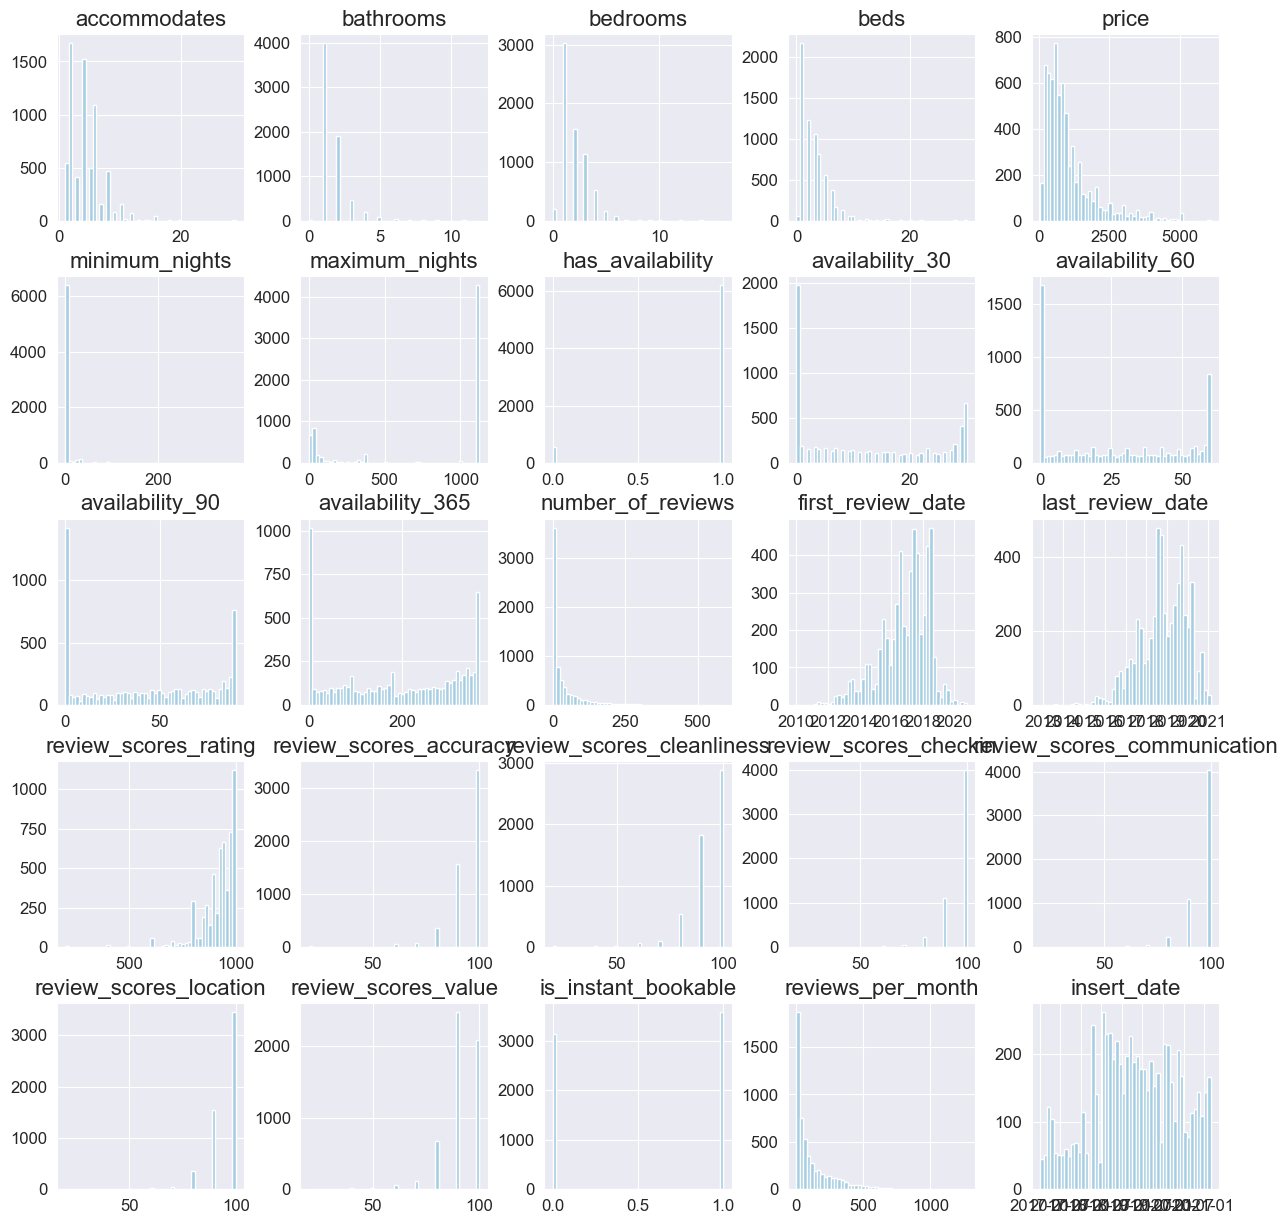

In [289]:
df_clean.drop(['apartment_id', 'host_id'], axis=1).hist(bins=50, figsize=(15,15))
plt.show()

### Categorical variables

In [290]:
df_clean.columns

Index(['apartment_id', 'name', 'description', 'host_id', 'neighbourhood_name',
       'neighbourhood_district', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities_list', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'first_review_date', 'last_review_date',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'is_instant_bookable', 'reviews_per_month',
       'country', 'city', 'insert_date', 'standardized_city',
       'standardized_neighbourhood', 'autonomous_community'],
      dtype='object')

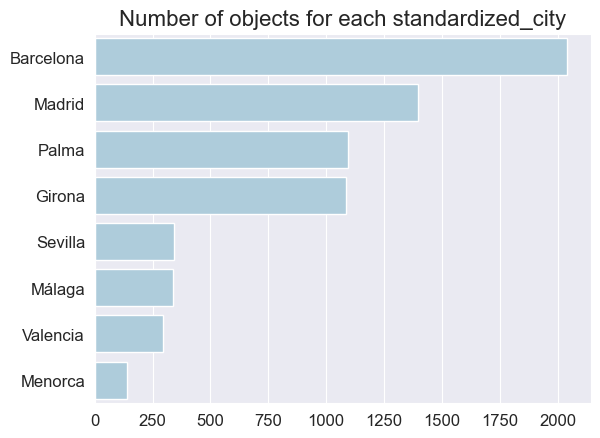

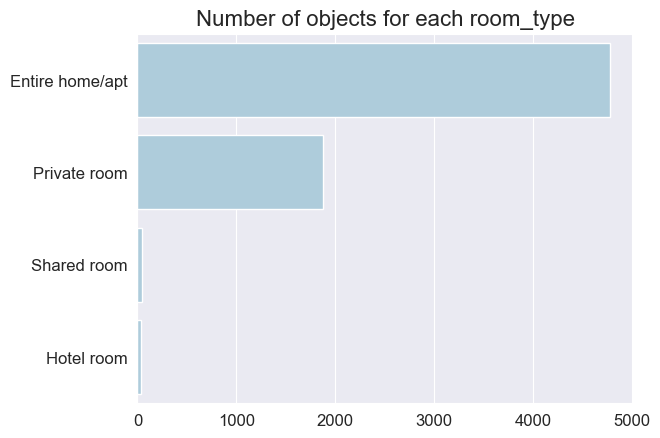

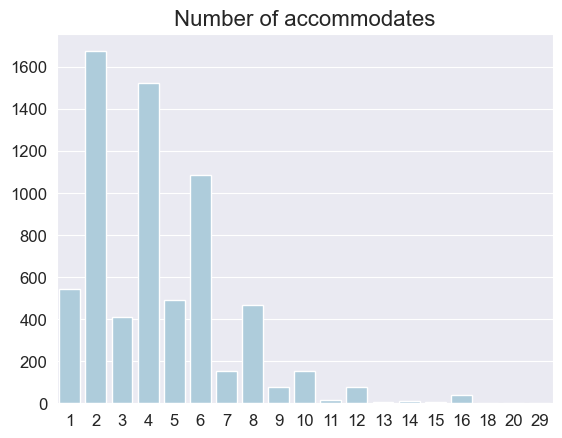

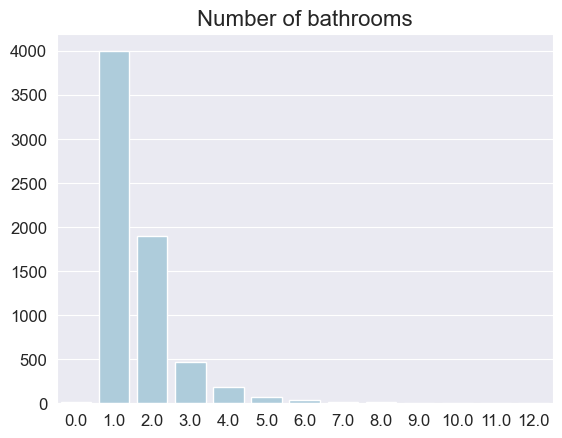

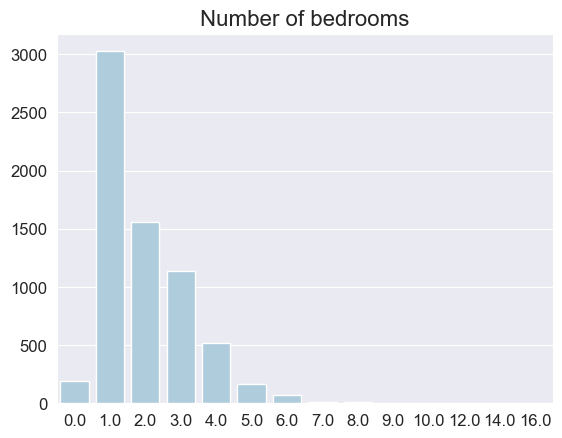

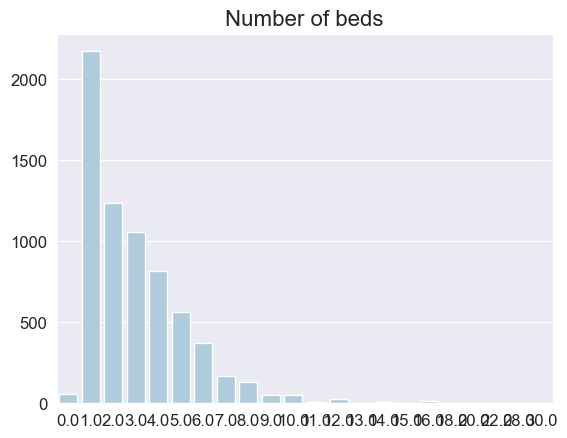

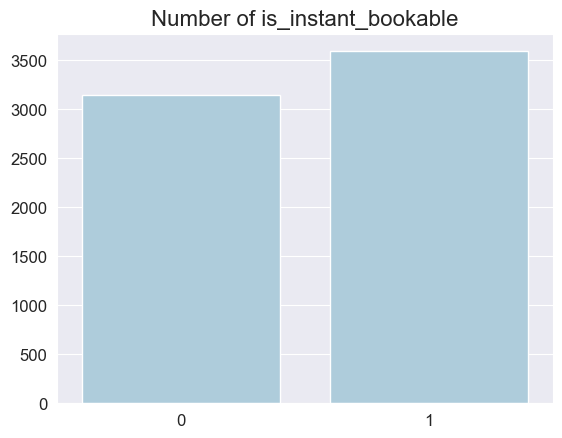

In [291]:
cat_cols = ['standardized_city', 'room_type', 'accommodates', 
            'bathrooms', 'bedrooms', 'beds',
            'is_instant_bookable']
            
for col in cat_cols:
    if col == 'standardized_city' or col == 'room_type':
        sns.countplot(data=df_clean, y=col, order=df_clean[col].value_counts().index)
        plt.title(f'Number of objects for each {col}')
    else:
        sns.countplot(data=df_clean, x=col)
        plt.title(f'Number of {col}')
    plt.xlabel(None)
    plt.ylabel(None)
    plt.show()

Let's check extreme values.

In [292]:
df_clean[df_clean.accommodates == 29]

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date,standardized_city,standardized_neighbourhood,autonomous_community
3116,15883302,Ca's Misser,"Beautiful rustic farm with a total area of 21,...",102986764,Algaida,NaN,Entire home/apt,29,8.00,14.00,22.00,"TV,Cable TV,Internet,Wifi,Air conditioning,Poo...",3270.00,1,1125,1,5,19,27,218,3,2019-05-27,2019-09-18,800.00,80.00,90.00,90.00,60.00,90.00,70.00,1,32.00,spain,mallorca,2020-02-29,Palma,Algaida,Islas Baleares


In [293]:
df_clean[df_clean.beds == 30]

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date,standardized_city,standardized_neighbourhood,autonomous_community
1118,5429715,Cal Pubill de Ciuret 35pax,Cal Pubill de Ciuret �s una de les grans masie...,20320423,Vidr�,NaN,Entire home/apt,16,9.00,14.00,30.00,"TV, Indoor fireplace, Pool, Iron, Crib, Hair d...",3486.00,2,1125,1,24,54,77,296,1,2019-12-08,2019-12-08,1000.00,100.00,100.00,100.00,100.00,100.00,100.00,1,9.00,spain,girona,2020-10-28,Girona,Vidré,Cataluña


In [294]:
df_clean[df_clean.bathrooms == 12]

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date,standardized_city,standardized_neighbourhood,autonomous_community
1984,11196074,Finca can Domingo Es Trenc beach,"At the heart of the Balearic archipelago, sout...",16964951,Campos,NaN,Entire home/apt,16,12.00,10.00,16.00,"TV,Cable TV,Internet,Wifi,Air conditioning,Poo...",3442.00,3,1125,1,13,38,68,322,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,spain,mallorca,2019-11-28,Palma,Campos,Islas Baleares


In [295]:
df_clean[df_clean.bedrooms == 16]

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date,standardized_city,standardized_neighbourhood,autonomous_community
4405,19412149,"Mallaui, a whole palace by the sea","Do you want to live in a Mediterranean villa, ...",136087677,Ciutadella de Menorca,NaN,Entire home/apt,16,7.00,16.00,28.00,"TV,Wifi,Kitchen,Free parking on premises,Smoki...",3524.00,4,30,1,9,10,10,85,4,2018-08-10,2019-07-09,1000.00,100.00,100.00,100.00,100.00,100.00,100.00,1,18.00,spain,menorca,2020-05-31,Menorca,Ciutadella,Islas Baleares


Data with "extreme" values looks normal.

### Numerical variables

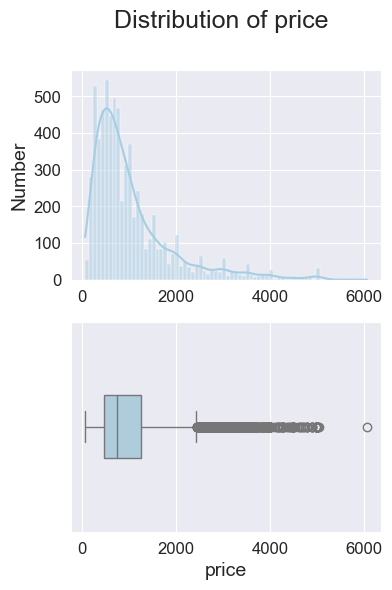

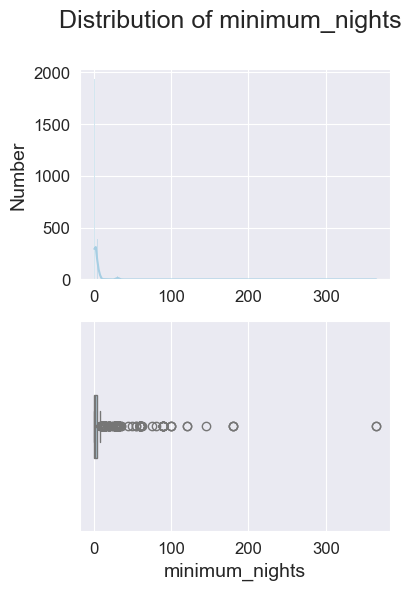

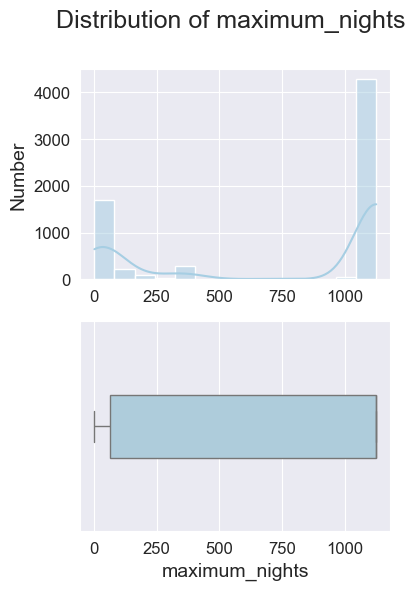

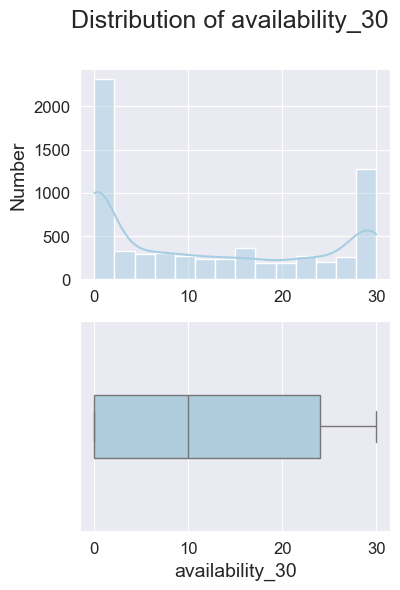

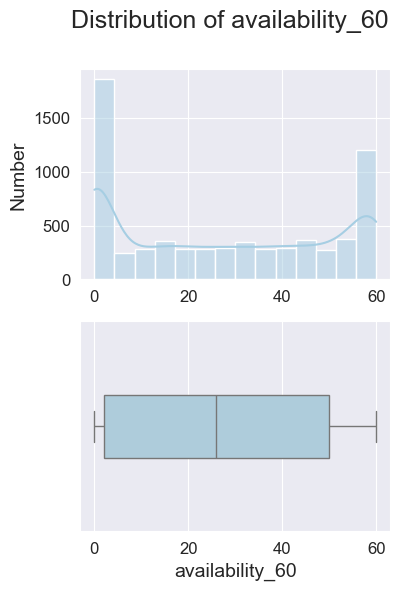

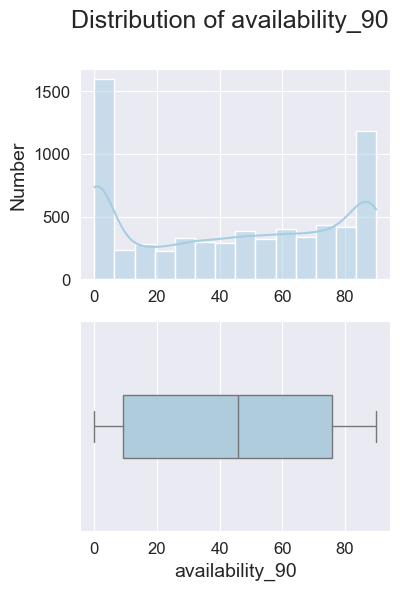

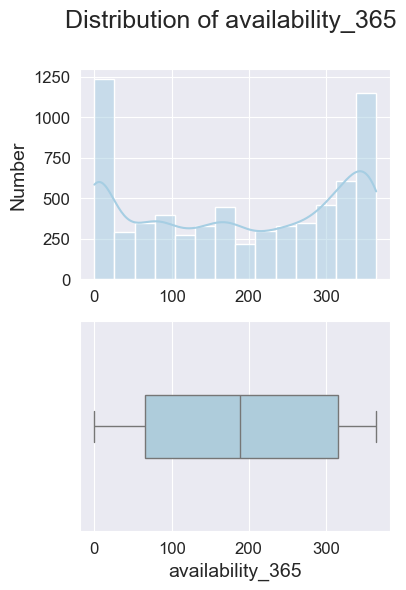

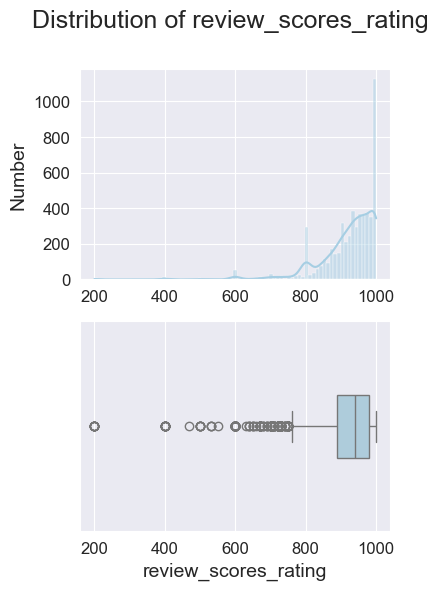

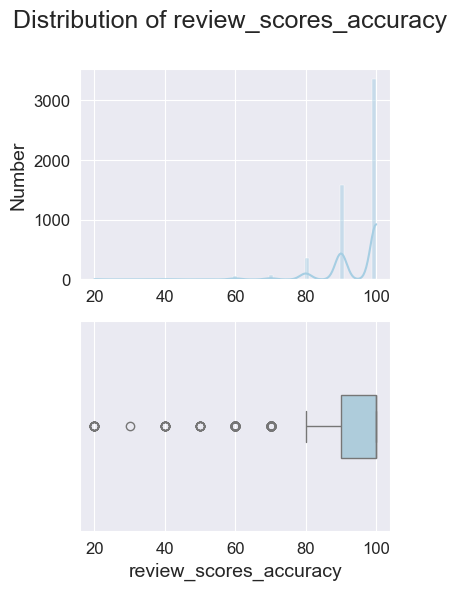

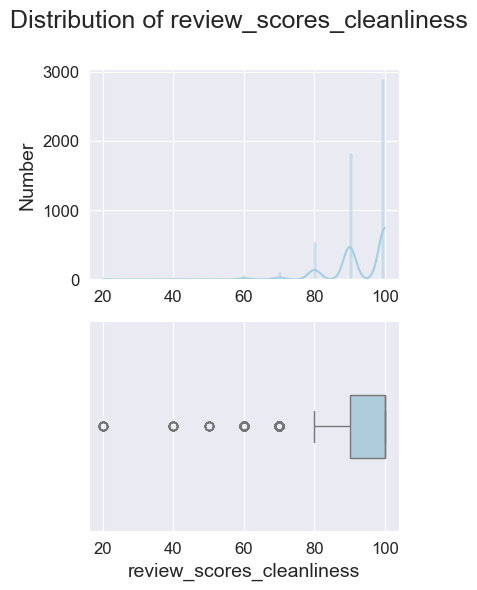

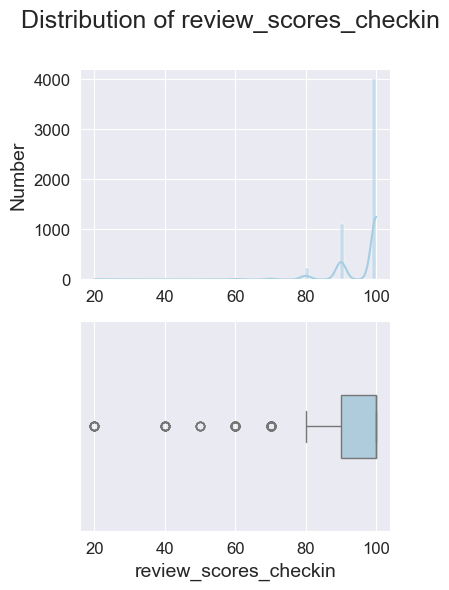

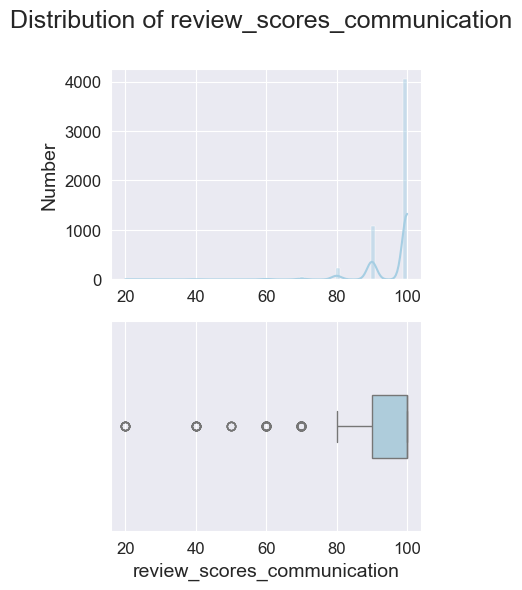

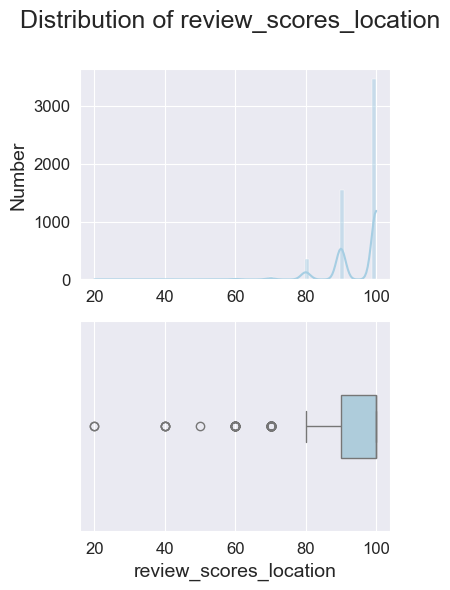

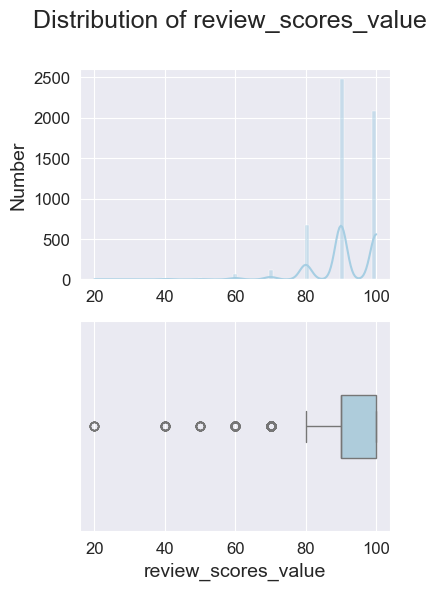

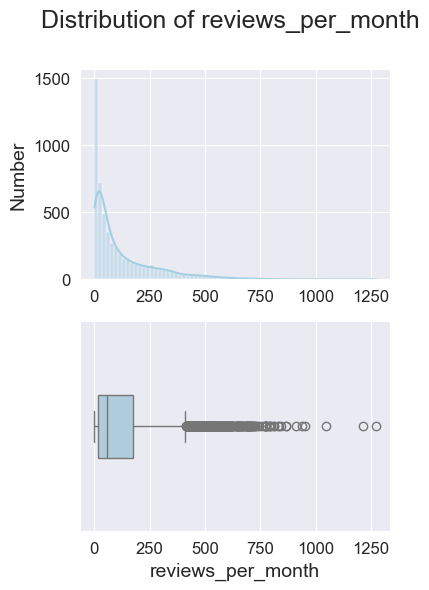

In [296]:
num_col = ['price', 'minimum_nights', 'maximum_nights',
           'availability_30', 'availability_60', 'availability_90', 'availability_365',
           'review_scores_rating', 'review_scores_accuracy',
           'review_scores_cleanliness', 'review_scores_checkin',
           'review_scores_communication', 'review_scores_location',
           'review_scores_value', 'reviews_per_month']

for col in num_col:
    
    # visualizing the distribution of transaction amounts
    fig, axs = plt.subplots(2, 1, figsize=(4, 6))
    fig.suptitle(f"Distribution of {col}")
    
    # histogram
    (sns.histplot(data=df_clean[col], kde=True, ax=axs[0])
        .set(xlabel=None, ylabel='Number')
    )
    
    # boxplot
    (sns.boxplot(data=df_clean[col], ax=axs[1], width=0.3, orient='h')
        #.set(yticklabels=[], xlabel=col)
    )
    plt.show()

### Reviews

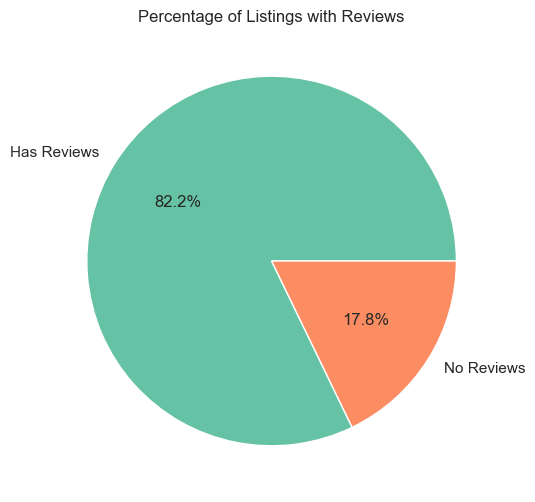

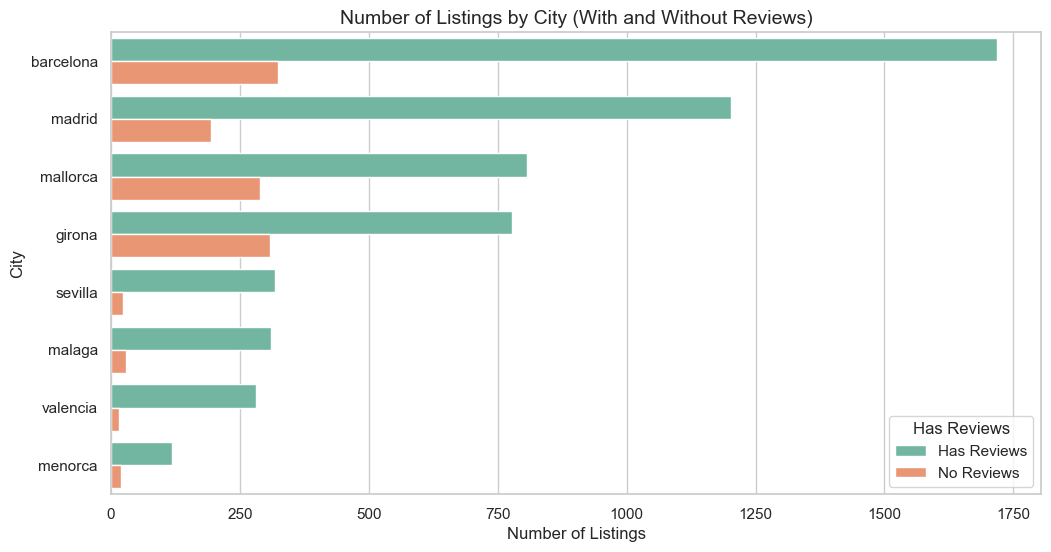

In [297]:
# Create a new column: "Has Reviews" (True/False)
df_clean['has_reviews'] = df_clean['number_of_reviews'] > 0

# Set up visualization style
sns.set_theme(style="whitegrid")

### Listings with and without reviews
plt.figure(figsize=(6, 6))
df_clean['has_reviews'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=["Has Reviews", "No Reviews"], colors=["#66c2a5", "#fc8d62"])
plt.title("Percentage of Listings with Reviews")
plt.ylabel("")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_clean,
    y="city",
    hue="has_reviews",
    order=df_clean["city"].value_counts().index,
    hue_order=[True, False],  
    palette=["#66c2a5", "#fc8d62"] 
)

plt.title("Number of Listings by City (With and Without Reviews)", fontsize=14)
plt.xlabel("Number of Listings")
plt.ylabel("City")
plt.legend(title="Has Reviews", labels=["Has Reviews", "No Reviews"]) 
plt.show()

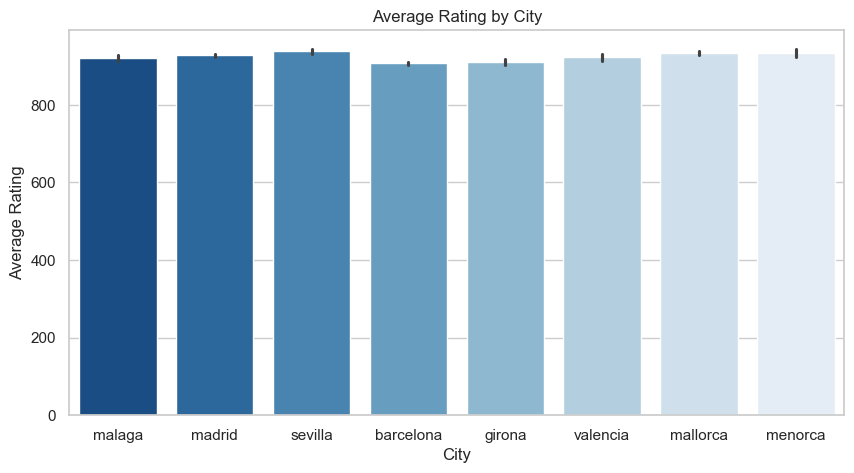

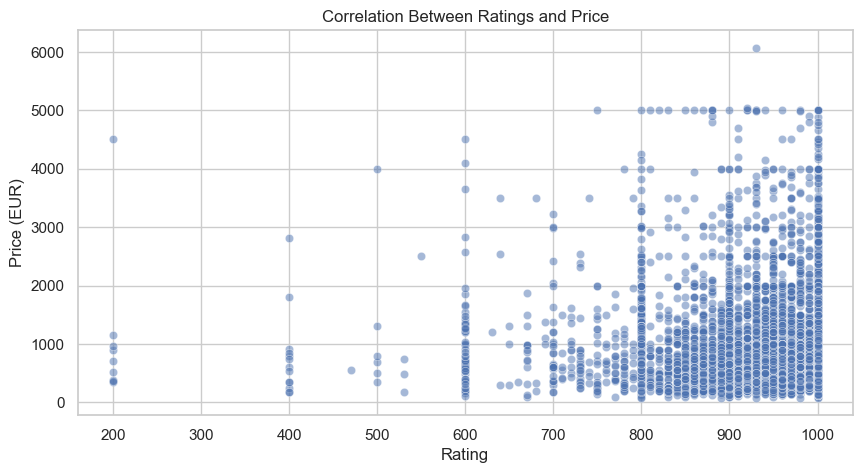

In [298]:
### Average rating by city
plt.figure(figsize=(10, 5))
sns.barplot(x='city', y='review_scores_rating', data=df_clean, estimator=lambda x: x.mean(), palette="Blues_r")
plt.title("Average Rating by City")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.show()

### Correlation between ratings and price
plt.figure(figsize=(10, 5))
sns.scatterplot(x='review_scores_rating', y='price', data=df_clean, alpha=0.5)
plt.title("Correlation Between Ratings and Price")
plt.xlabel("Rating")
plt.ylabel("Price (EUR)")
plt.show()

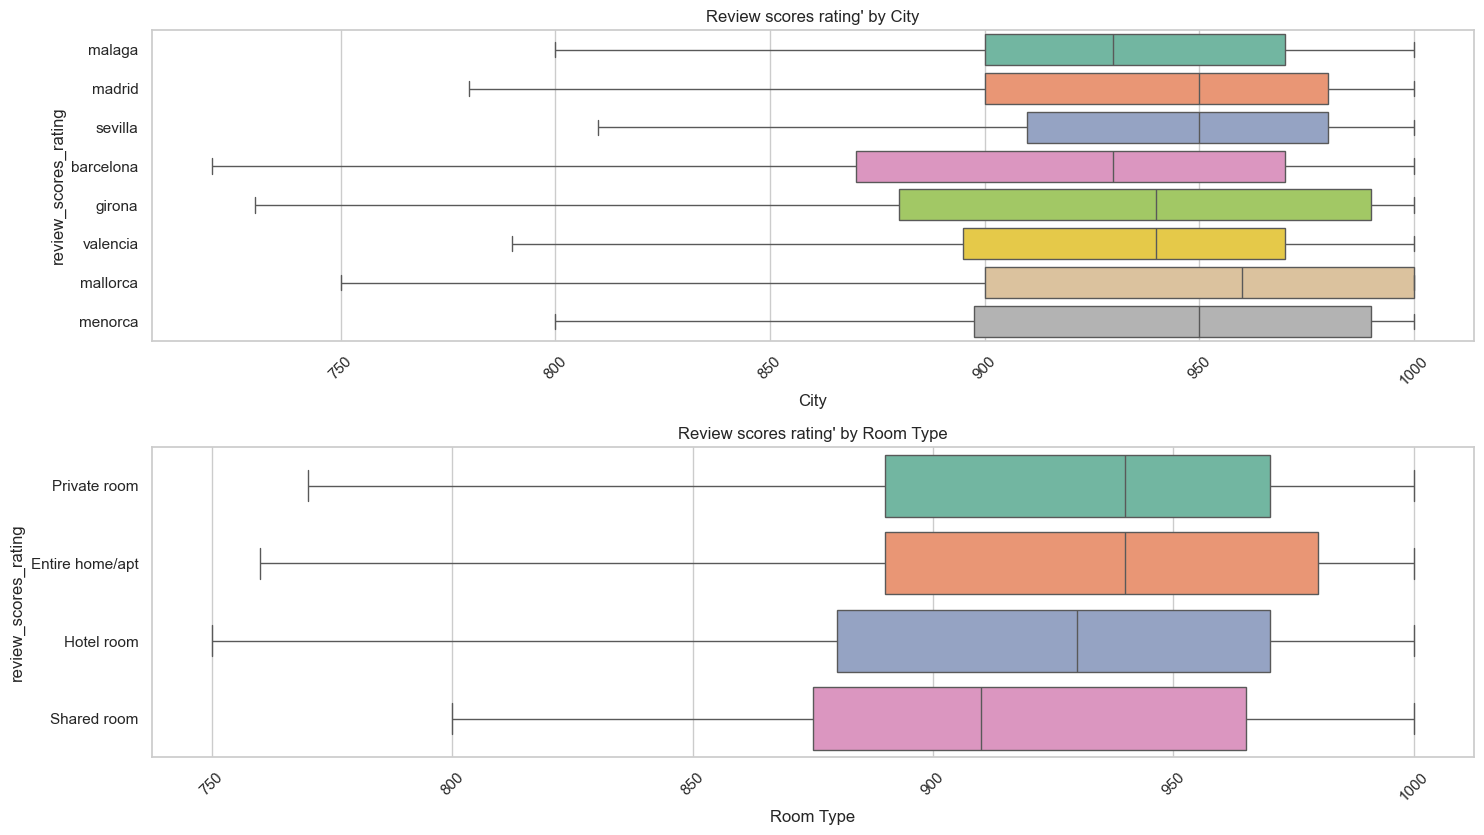

In [299]:
# Define categorical variables to analyze
categorical_vars = ["city", "room_type"]

# Set up the figure
plt.figure(figsize=(15, 12))

# Loop through each categorical variable and create a boxplot
for i, category in enumerate(categorical_vars, 1):
    plt.subplot(3, 1, i)  # Create subplots (3 rows, 1 column)
    sns.boxplot(x='review_scores_rating', y=category, data=df_clean, showfliers=False, palette="Set2")
    plt.xticks(rotation=45)  # Rotate labels for readability
    plt.title(f"Review scores rating' by {category.replace('_', ' ').title()}")
    plt.xlabel(category.replace('_', ' ').title())
    plt.ylabel("review_scores_rating")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


### Insert Date

In [300]:
df_clean.insert_date.min(), df_clean.insert_date.max()

(Timestamp('2017-01-04 00:00:00'), Timestamp('2021-02-27 00:00:00'))

Let's investigate our insert dates using `price` and `availability_30`.

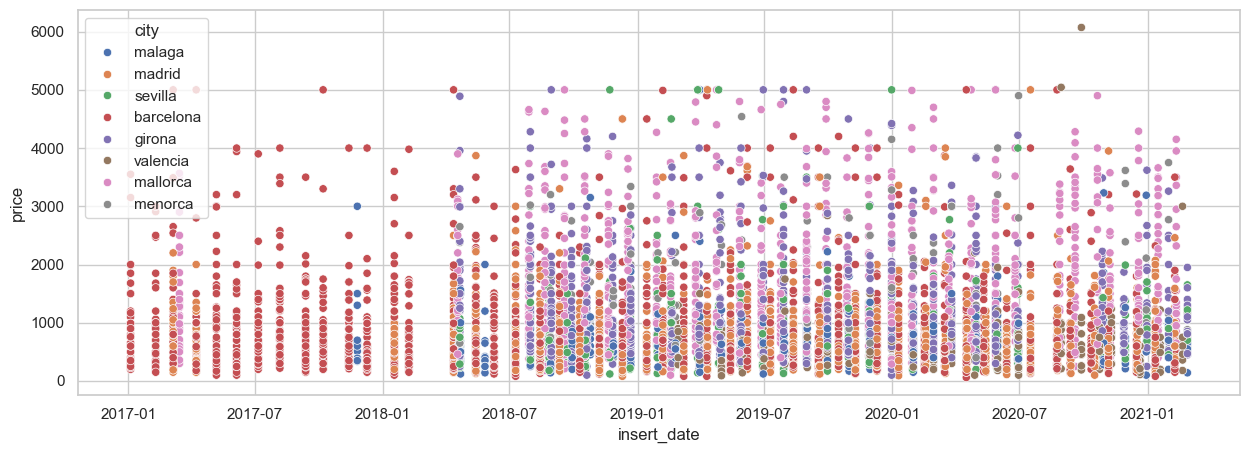

In [301]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df_clean, x='insert_date', y='price', hue='city')
plt.show()

In [302]:
df_clean.groupby(df_clean.insert_date.dt.year).price.count()

insert_date
2017     773
2018    1910
2019    2151
2020    1631
2021     268
Name: price, dtype: int64

In [303]:
df_clean.groupby([df_clean.insert_date.dt.year, df_clean.insert_date.dt.month]).availability_30.sum()

insert_date  insert_date
2017         1               773
             2               566
             3              1919
             4               957
             5               438
             6               439
             7               401
             8               403
             9               388
             10              635
             11              978
             12              715
2018         1              1467
             2               741
             4              2714
             5              1248
             6               404
             7              2477
             8              2796
             9              3000
             10             2392
             11             3243
             12             1793
2019         1              1561
             2              2312
             3              2661
             4              1749
             5              2434
             6              1186
             7    

In [304]:
df_clean.query("insert_date < last_review_date")

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date,standardized_city,standardized_neighbourhood,autonomous_community,has_reviews
1313,6547870,Bella Vista. N� de registro: HUTB005799,Bella Vista es un apartamento �nico en Barcelo...,34249903,el Baix Guinard�,Horta-Guinard�,Entire home/apt,7,1.00,3.00,4.00,"TV,Internet,Wireless Internet,Air conditioning...",750.00,4,1125,0,30,45,47,238,25,2015-10-10,2017-01-05,860.00,90.00,80.00,90.00,90.00,90.00,90.00,1,165.00,spain,barcelona,2017-01-04,Barcelona,El Baix Guinardó,Cataluña,True
3570,17398411,Newly renovated design loft CHUECA 3 IZQ,"Bright apartment in the center of Madrid, in t...",107335103,Universidad,Centro,Entire home/apt,4,1.00,1.00,2.00,"Smoke alarm, TV, Washer, Wifi, Smart lock, Iro...",490.00,15,90,1,23,50,79,79,228,2017-04-04,2020-10-18,830.00,80.00,80.00,90.00,90.00,90.00,80.00,1,526.00,spain,madrid,2020-10-17,Madrid,Universidad,Comunidad de Madrid,True
4961,21170845,DEIA famous village Font Fresca house ETV/8481,This charming 2 bedroom house in the beautiful...,24227166,Dey�,NaN,Entire home/apt,4,2.00,2.00,4.00,"Dishes and silverware, BBQ grill, TV, Wifi, Ir...",1030.00,4,28,1,30,60,83,131,92,2017-10-21,2020-12-20,970.00,100.00,100.00,100.00,100.00,100.00,100.00,0,237.00,spain,mallorca,2020-12-19,Palma,Deià,Islas Baleares,True


In [229]:
df.query("insert_date < first_review_date")

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date


## Conclusion
The following changes were made to the dataset:

**Duplicates**
- Removed older listings for duplicated `apartment_id`, keeping only the most recent entry (`insert_date`).

**Data Types**
- Converted the is_instant_bookable column to boolean: 'FALSO' → 0, 'VERDADERO' → 1

**Missing Values**
- Filled NaN values in `has_availability`: NaN → 0, 'VERDADERO' → 1
- Imputed missing values in `price` using the KNNImputer algorithm.

**Data Standardization**
- Added columns with city names and neighbourhood_district using correct Spanish accents.
- Added a new column: `autonomous_community`.

## Save Clean Dataframe

In [305]:
data_info(df_clean)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6733 entries, 0 to 6732
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   apartment_id                 6733 non-null   int64         
 1   name                         6730 non-null   object        
 2   description                  6706 non-null   object        
 3   host_id                      6733 non-null   int64         
 4   neighbourhood_name           6733 non-null   object        
 5   neighbourhood_district       4075 non-null   object        
 6   room_type                    6733 non-null   object        
 7   accommodates                 6733 non-null   int64         
 8   bathrooms                    6702 non-null   float64       
 9   bedrooms                     6704 non-null   float64       
 10  beds                         6730 non-null   float64       
 11  amenities_list               6717 non-null 

apartment_id                   6733
name                           6712
description                    6687
host_id                        5238
neighbourhood_name              478
neighbourhood_district           61
room_type                         4
accommodates                     19
bathrooms                        13
bedrooms                         14
beds                             22
amenities_list                 6635
price                           472
minimum_nights                   38
maximum_nights                  129
has_availability                  2
availability_30                  31
availability_60                  61
availability_90                  91
availability_365                366
number_of_reviews               318
first_review_date              1793
last_review_date               1450
review_scores_rating             45
review_scores_accuracy            9
review_scores_cleanliness         8
review_scores_checkin             8
review_scores_communication 


Number of missing values


,number,percentage
neighbourhood_district,2658,39.48
review_scores_value,1289,19.14
review_scores_location,1289,19.14
review_scores_checkin,1288,19.13
review_scores_accuracy,1283,19.06
review_scores_communication,1279,19.00
review_scores_cleanliness,1277,18.97
review_scores_rating,1274,18.92
last_review_date,1204,17.88
reviews_per_month,1203,17.87



There are no full duplicates in the data



In [306]:
#df_clean.to_csv(f'../Data/data_clean_sprint_{SPRINT}.csv', index=False)
df_clean.to_csv(f'../Data/data_clean_latest.csv', index=False) 

## Transfer DataFrame to Stage 1 in MySQL
- first, we need install sqlalchemy,
- second, connect to mysql
- third, a function to copy df to mysql table

In [307]:
#!pip install sqlalchemy

In [310]:
# Automatically find the .env file
dotenv_path = find_dotenv()

# If found, load the .env file
if dotenv_path:
    load_dotenv(dotenv_path)
else:
    print(".env file not found")
# configuration for MySQL connection
config = {
  'user': os.getenv('MYSQL_USER'),
  'password': os.getenv('MYSQL_PASSWORD'),
  'host': os.getenv('HOST'),
  'database': os.getenv('DB'),
  'raise_on_warnings': True
}

In [ ]:
# mi conexion se llama connection
def df_to_mysql(df: pd.DataFrame, table_name: str):
  try:
      # Assuming 'df_new' is your DataFrame
      # Create a SQLAlchemy engine
      engine = sqlalchemy.create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}/{database}")
      
      # Use the engine with to_sql
      df.to_sql(table_name, engine, if_exists='replace', index=False)  
      print("DataFrame successfully written to MySQL table: ", table_name )

  except mysql.connector.Error as err:
      print(f"Error writing DataFrame to MySQL: {err}")

  finally:
      if connection.is_connected():
          connection.close()
          print("MySQL connection closed.")

In [ ]:
df_to_mysql(df_clean, "ST1_Tourist_Accommodation")